# INTEGRATE Synthetic Case Study example
An example using inverting data obtained from synthetic reference model


In [1]:
try:
    # Check if the code is running in an IPython kernel (which includes Jupyter notebooks)
    get_ipython()
    # If the above line doesn't raise an error, it means we are in a Jupyter environment
    # Execute the magic commands using IPython's run_line_magic function
    get_ipython().run_line_magic('load_ext', 'autoreload')
    get_ipython().run_line_magic('autoreload', '2')
except:
    # If get_ipython() raises an error, we are not in a Jupyter environment
    # # # # # # # # # #%load_ext autoreload
    # # # # # # # # # #%autoreload 2
    pass

import integrate as ig
# check if parallel computations can be performed
parallel = ig.use_parallel(showInfo=1)

import numpy as np
import os
import matplotlib.pyplot as plt
import h5py
hardcopy=True

Notebook detected. Parallel processing is OK


## Create The reference model and data

In [2]:
# Create reference model

# select the type of referenc model
case = 'wedge'
case = '3layer'

z_max = 60
rho = [120,10,120]
#rho = [10,120,10]
rho = [120,10,10]
#rho = [720,10,520]
dx=0.1
if case.lower() == 'wedge':
    # Make Wedge MODEL
    M_ref, x_ref, z_ref, M_ref_lith, layer_depths = ig.synthetic_case(case='Wedge', wedge_angle=10, dx=dx, z_max=z_max, dz=.5, x_max=100, z1=15, rho = rho)
elif case.lower() == '3layer':
    # Make 3 layer MODEL
    M_ref, x_ref, z_ref, M_ref_lith, layer_depths = ig.synthetic_case(case='3layer', dx=dx, rho1_1 = rho[0], rho1_2 = rho[1], rho3=rho[2], x_max = 100, x_range = 10)

# Create reference data
f_data_h5 = '%s_%d.h5' % (case,z_max)    
thickness = np.diff(z_ref)
# Get an exampele of a GEX file
file_gex = ig.get_case_data(case='DAUGAARD', filelist=['TX07_20231016_2x4_RC20-33.gex'])[0]
D_ref = ig.forward_gaaem(C=1./M_ref, thickness=thickness, file_gex=file_gex)

# Initialize random number generator to sample from noise model!
rng = np.random.default_rng()
d_std = 0.05 # 5% relative noise
d_std = 0.10
d_std_base = 1e-12
D_std = d_std * D_ref + d_std_base
D_noise = rng.normal(0, D_std, D_ref.shape)
D_obs = D_ref + D_noise

# Write to hdf5 file
# Add option to reomve existing file before writing!
f_data_h5 = ig.save_data_gaussian(D_obs, D_std = D_std, f_data_h5 = f_data_h5, id=1, showInfo=1)
#check_data(f_data_h5)

Getting data for case: DAUGAARD
--> Got data for case: DAUGAARD


gatdaem1d:   0%|                                                                                                                               | 0/1000 [00:00<?, ?it/s]

gatdaem1d:   7%|████████                                                                                                              | 68/1000 [00:01<00:13, 67.36it/s]

gatdaem1d:  14%|████████████████                                                                                                     | 137/1000 [00:02<00:12, 67.96it/s]

gatdaem1d:  21%|████████████████████████                                                                                             | 206/1000 [00:03<00:11, 68.24it/s]

gatdaem1d:  28%|████████████████████████████████▏                                                                                    | 275/1000 [00:04<00:10, 68.14it/s]

gatdaem1d:  34%|████████████████████████████████████████▏                                                                            | 344/1000 [00:05<00:09, 68.13it/s]

gatdaem1d:  41%|████████████████████████████████████████████████▍                                                                    | 414/1000 [00:06<00:08, 68.58it/s]

gatdaem1d:  48%|████████████████████████████████████████████████████████▌                                                            | 483/1000 [00:07<00:07, 68.42it/s]

gatdaem1d:  55%|████████████████████████████████████████████████████████████████▌                                                    | 552/1000 [00:08<00:06, 68.28it/s]

gatdaem1d:  62%|████████████████████████████████████████████████████████████████████████▋                                            | 621/1000 [00:09<00:05, 68.11it/s]

gatdaem1d:  69%|████████████████████████████████████████████████████████████████████████████████▋                                    | 690/1000 [00:10<00:04, 67.93it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████████████████████████████████████████▋                            | 758/1000 [00:11<00:03, 67.58it/s]

gatdaem1d:  83%|████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 826/1000 [00:12<00:02, 67.46it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 894/1000 [00:13<00:01, 67.02it/s]

gatdaem1d:  96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 962/1000 [00:14<00:00, 66.39it/s]

Data has 1000 stations and 40 channels
Creating 3layer_60.h5:/UTMX
Creating 3layer_60.h5:/UTMY
Creating 3layer_60.h5:/LINE
Creating 3layer_60.h5:/ELEVATION
Adding group 3layer_60.h5:D1 


plot_data: Found data set D1
plot_data: Using data set D1


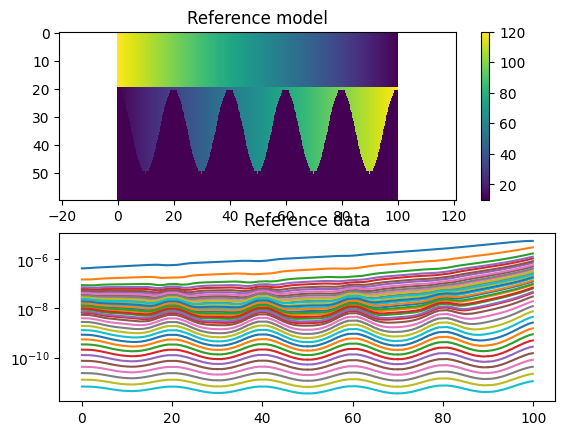

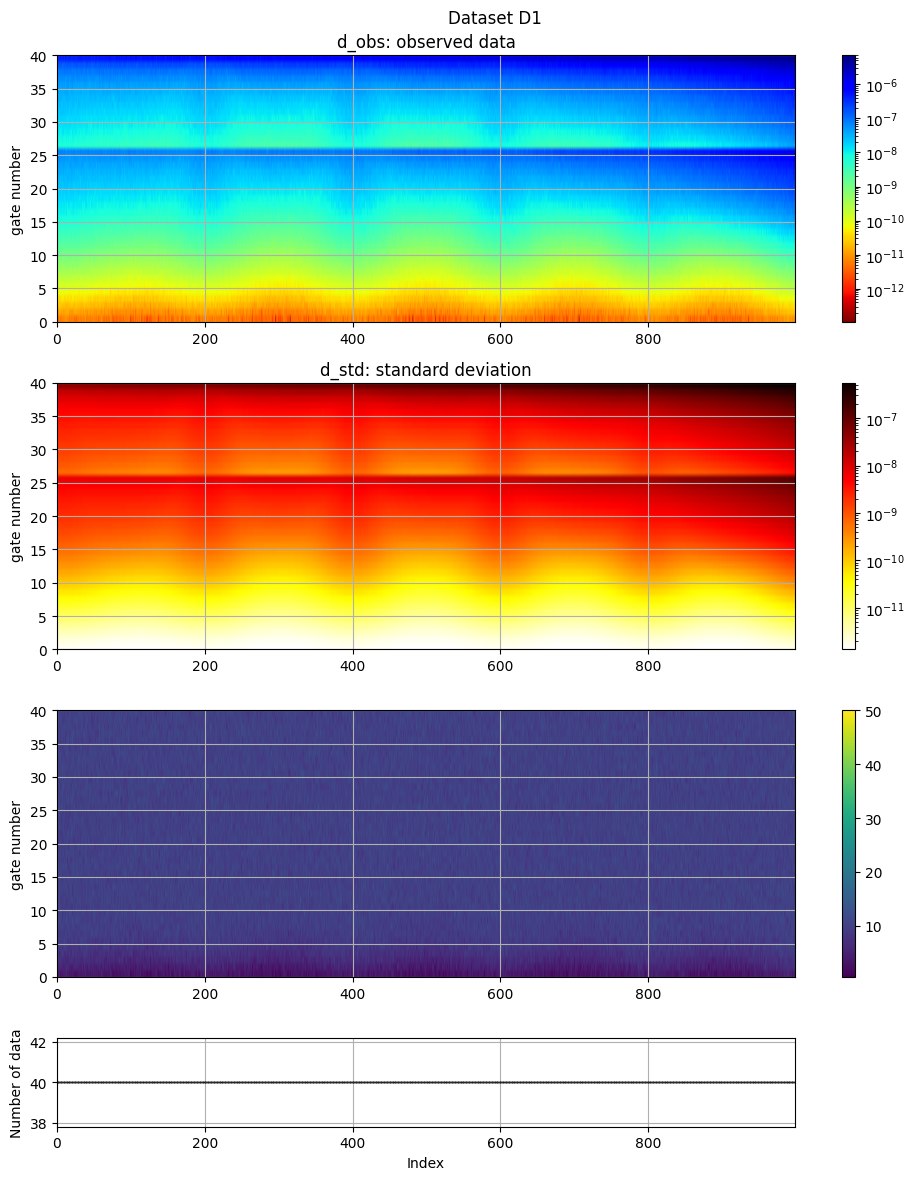

In [3]:
# Plot the model and data
plt.figure()
plt.subplot(2,1,1)
xx_ref, zz_ref = np.meshgrid(x_ref, z_ref)
plt.pcolor(xx_ref,zz_ref,M_ref.T)
plt.gca().invert_yaxis()
plt.axis('equal')
plt.colorbar()
plt.title('Reference model')
plt.subplot(2,1,2)
plt.semilogy(x_ref,D_ref);
plt.title('Reference data')

ig.plot_data(f_data_h5)

## Create prior model and data

prior_layered:   0%|                                                                                                                          | 0/50000 [00:00<?, ?it/s]

File PRIOR_UNIFORM_NL_2-3_log-uniform_N50000.h5 does not exist.


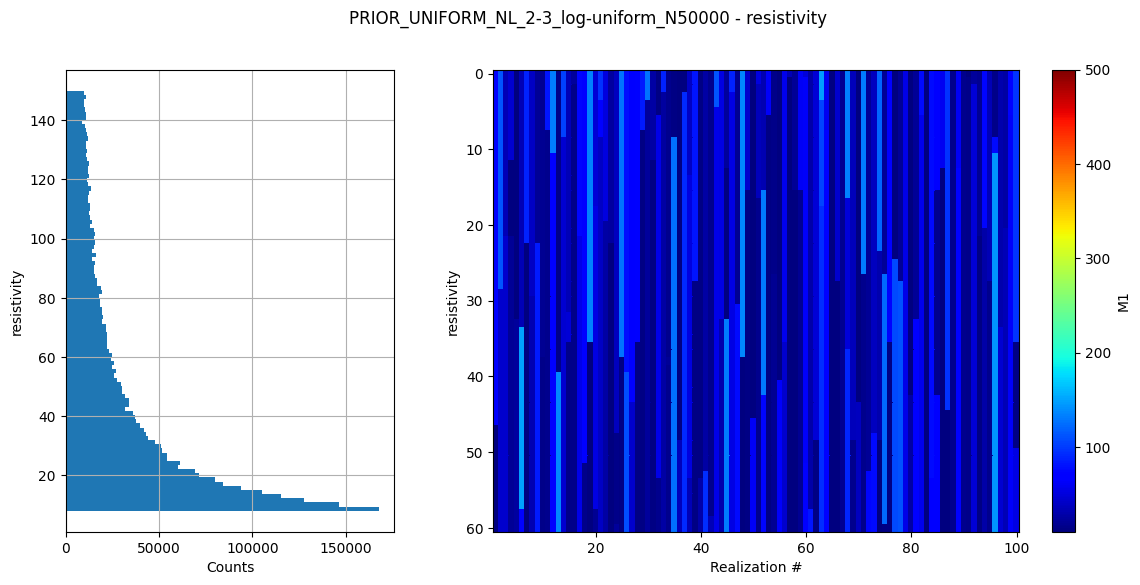

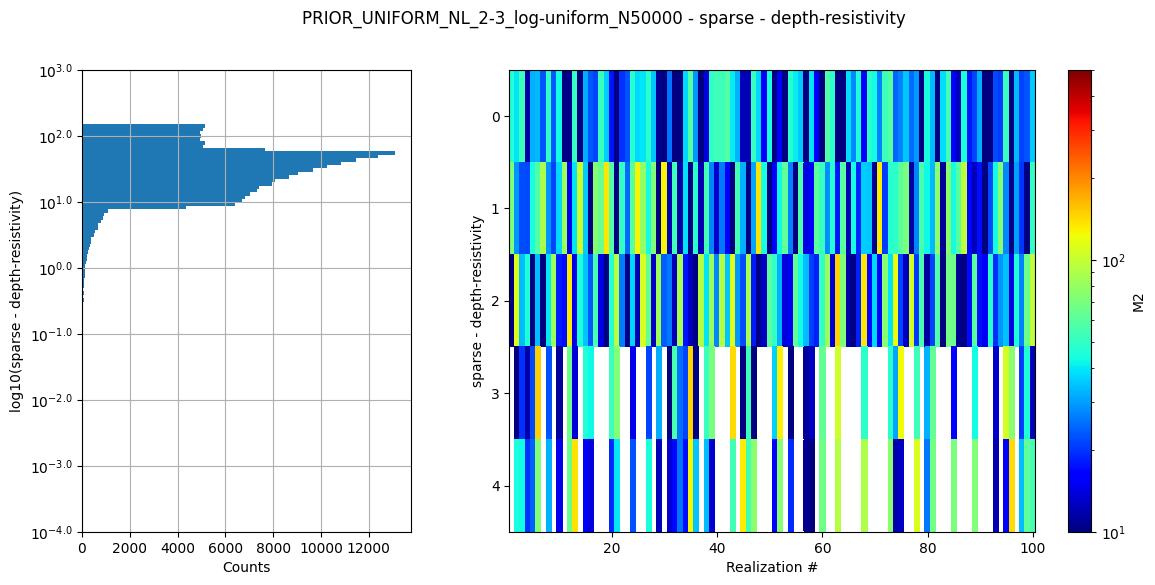

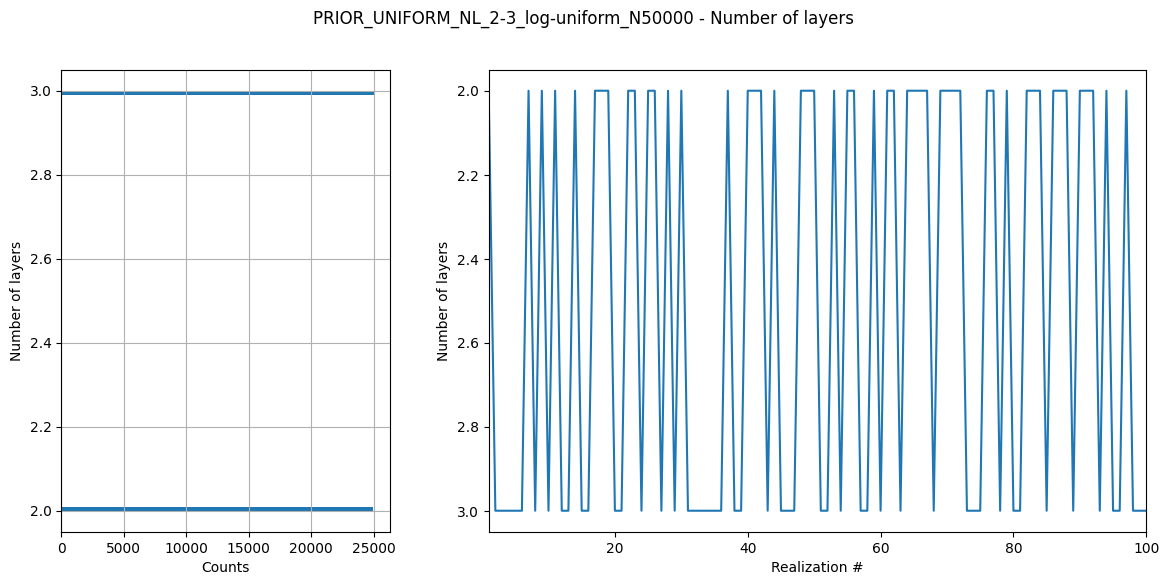

In [4]:
N=50000 # sample size 
RHO_dist='log-uniform'
#RHO_dist='uniform'
RHO_min=0.8*min(rho)
RHO_max=1.25*max(rho)
NLAY_min=2
NLAY_max=3
f_prior_h5 = ig.prior_model_layered(N=N,
                                    lay_dist='uniform', z_max = z_max, 
                                    NLAY_min=NLAY_min, NLAY_max=NLAY_max, 
                                    RHO_dist=RHO_dist, RHO_min=RHO_min, RHO_max=RHO_max)

ig.plot_prior_stats(f_prior_h5)

Using file_basename=TX07_20231016_2x4_RC20-33


prior_data_gaaem: Using 32 parallel threads.


gatdaem1d:   0%|                                                                                                                               | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   3%|███▍                                                                                                                  | 46/1563 [00:01<00:33, 45.84it/s]

gatdaem1d:   3%|███▋                                                                                                                  | 49/1563 [00:01<00:30, 48.86it/s]

gatdaem1d:   2%|██▋                                                                                                                   | 36/1563 [00:01<00:42, 35.56it/s]

gatdaem1d:   2%|██▋                                                                                                                   | 36/1563 [00:01<00:43, 35.43it/s]

gatdaem1d:   2%|██▋                                                                                                                   | 35/1563 [00:01<00:44, 34.45it/s]

gatdaem1d:   2%|██▋                                                                                                                   | 35/1563 [00:01<00:43, 34.80it/s]

gatdaem1d:   3%|███▋                                                                                                                  | 49/1563 [00:01<00:31, 48.33it/s]

gatdaem1d:   2%|██▋                                                                                                                   | 35/1562 [00:01<00:43, 34.74it/s]

gatdaem1d:   2%|██▋                                                                                                                   | 36/1563 [00:01<00:43, 35.26it/s]

gatdaem1d:   3%|███▍                                                                                                                  | 45/1563 [00:01<00:34, 44.50it/s]

gatdaem1d:   2%|██▊                                                                                                                   | 37/1563 [00:01<00:42, 36.20it/s]

gatdaem1d:   3%|███▍                                                                                                                  | 46/1563 [00:01<00:33, 45.29it/s]

gatdaem1d:   2%|██▋                                                                                                                   | 36/1562 [00:01<00:42, 35.88it/s]

gatdaem1d:   2%|██▋                                                                                                                   | 36/1563 [00:01<00:43, 35.12it/s]

gatdaem1d:   2%|██▋                                                                                                                   | 36/1562 [00:01<00:42, 35.94it/s]

gatdaem1d:   2%|██▋                                                                                                                   | 36/1563 [00:01<00:43, 35.36it/s]

gatdaem1d:   3%|███▍                                                                                                                  | 46/1563 [00:01<00:33, 45.33it/s]

gatdaem1d:   2%|██▊                                                                                                                   | 37/1563 [00:01<00:41, 36.35it/s]

gatdaem1d:   3%|███▍                                                                                                                  | 45/1563 [00:01<00:33, 44.86it/s]

gatdaem1d:   2%|██▋                                                                                                                   | 36/1562 [00:01<00:43, 35.30it/s]

gatdaem1d:   2%|██▋                                                                                                                   | 35/1562 [00:01<00:43, 35.00it/s]

gatdaem1d:   3%|███▍                                                                                                                  | 46/1562 [00:01<00:33, 45.61it/s]

gatdaem1d:   3%|███▌                                                                                                                  | 47/1562 [00:01<00:32, 46.80it/s]

gatdaem1d:   2%|██▋                                                                                                                   | 36/1562 [00:01<00:43, 35.15it/s]

gatdaem1d:   2%|██▋                                                                                                                   | 35/1562 [00:01<00:44, 34.18it/s]

gatdaem1d:   3%|███▋                                                                                                                  | 49/1562 [00:01<00:31, 48.21it/s]

gatdaem1d:   3%|███▌                                                                                                                  | 47/1562 [00:01<00:32, 46.99it/s]

gatdaem1d:   3%|███▍                                                                                                                  | 45/1562 [00:01<00:34, 43.73it/s]

gatdaem1d:   3%|███▏                                                                                                                  | 43/1562 [00:01<00:35, 42.74it/s]

gatdaem1d:   3%|███▎                                                                                                                  | 44/1562 [00:01<00:34, 43.54it/s]

gatdaem1d:   3%|███▍                                                                                                                  | 45/1562 [00:01<00:34, 44.45it/s]

gatdaem1d:   3%|███▌                                                                                                                  | 47/1562 [00:01<00:33, 45.82it/s]

gatdaem1d:   6%|██████▉                                                                                                               | 92/1563 [00:02<00:32, 45.59it/s]

gatdaem1d:   5%|█████▍                                                                                                                | 72/1563 [00:02<00:41, 35.56it/s]

gatdaem1d:   6%|███████▍                                                                                                              | 98/1563 [00:02<00:30, 48.45it/s]

gatdaem1d:   5%|█████▍                                                                                                                | 72/1563 [00:02<00:41, 35.54it/s]

gatdaem1d:   4%|█████▎                                                                                                                | 70/1563 [00:02<00:43, 34.63it/s]

gatdaem1d:   5%|██████▎                                                                                                               | 83/1563 [00:02<00:35, 42.07it/s]

gatdaem1d:   5%|█████▎                                                                                                                | 71/1563 [00:02<00:42, 35.10it/s]

gatdaem1d:   5%|██████▎                                                                                                               | 84/1562 [00:02<00:34, 42.85it/s]

gatdaem1d:   5%|██████▍                                                                                                               | 85/1563 [00:02<00:34, 43.05it/s]

gatdaem1d:   4%|█████▎                                                                                                                | 70/1562 [00:02<00:43, 34.67it/s]

gatdaem1d:   5%|██████▍                                                                                                               | 85/1563 [00:02<00:34, 42.61it/s]

gatdaem1d:   6%|██████▊                                                                                                               | 90/1563 [00:02<00:33, 44.50it/s]

gatdaem1d:   5%|█████▌                                                                                                                | 73/1562 [00:02<00:41, 36.09it/s]

gatdaem1d:   4%|█████▎                                                                                                                | 70/1562 [00:02<00:43, 34.59it/s]

gatdaem1d:   5%|█████▍                                                                                                                | 72/1562 [00:02<00:41, 35.50it/s]

gatdaem1d:   5%|██████                                                                                                                | 81/1563 [00:02<00:36, 40.62it/s]

gatdaem1d:   6%|██████▉                                                                                                               | 92/1562 [00:02<00:32, 45.24it/s]

gatdaem1d:   6%|██████▉                                                                                                               | 92/1563 [00:02<00:32, 44.72it/s]

gatdaem1d:   5%|█████▍                                                                                                                | 72/1562 [00:02<00:42, 35.34it/s]

gatdaem1d:   5%|█████▍                                                                                                                | 72/1563 [00:02<00:42, 34.87it/s]

gatdaem1d:   4%|█████▎                                                                                                                | 70/1562 [00:02<00:43, 34.31it/s]

gatdaem1d:   6%|███████▎                                                                                                              | 96/1562 [00:02<00:30, 47.74it/s]

gatdaem1d:   6%|███████▍                                                                                                              | 98/1562 [00:02<00:30, 48.04it/s]

gatdaem1d:   6%|██████▋                                                                                                               | 88/1562 [00:02<00:33, 43.78it/s]

gatdaem1d:   6%|██████▊                                                                                                               | 90/1562 [00:02<00:33, 44.60it/s]

gatdaem1d:   6%|██████▋                                                                                                               | 89/1562 [00:02<00:33, 43.91it/s]

gatdaem1d:   6%|███████▏                                                                                                              | 95/1562 [00:02<00:31, 46.43it/s]

gatdaem1d:   6%|██████▉                                                                                                               | 92/1563 [00:02<00:36, 39.83it/s]

gatdaem1d:   6%|██████▊                                                                                                               | 90/1563 [00:02<00:37, 38.79it/s]

gatdaem1d:   6%|██████▋                                                                                                               | 89/1562 [00:02<00:38, 38.76it/s]

gatdaem1d:   6%|███████                                                                                                               | 94/1562 [00:02<00:36, 40.66it/s]

gatdaem1d:   6%|███████▍                                                                                                              | 98/1563 [00:02<00:36, 39.70it/s]

gatdaem1d:   7%|████████▌                                                                                                            | 115/1563 [00:03<00:36, 39.24it/s]

gatdaem1d:   9%|██████████▎                                                                                                          | 138/1563 [00:03<00:31, 45.28it/s]

gatdaem1d:   9%|█████████▉                                                                                                           | 133/1563 [00:03<00:31, 45.30it/s]

gatdaem1d:   8%|█████████▉                                                                                                           | 132/1563 [00:03<00:31, 44.88it/s]

gatdaem1d:   7%|████████                                                                                                             | 108/1563 [00:03<00:41, 35.39it/s]

gatdaem1d:   7%|████████                                                                                                             | 108/1563 [00:03<00:41, 35.36it/s]

gatdaem1d:   7%|███████▉                                                                                                             | 106/1562 [00:03<00:41, 35.08it/s]

gatdaem1d:   7%|████████                                                                                                             | 107/1563 [00:03<00:41, 35.08it/s]

gatdaem1d:   9%|██████████                                                                                                           | 134/1563 [00:03<00:31, 45.25it/s]

gatdaem1d:   8%|█████████▍                                                                                                           | 126/1563 [00:03<00:33, 42.59it/s]

gatdaem1d:   9%|██████████                                                                                                           | 135/1563 [00:03<00:32, 44.50it/s]

gatdaem1d:   9%|██████████▎                                                                                                          | 138/1562 [00:03<00:31, 45.39it/s]

gatdaem1d:   7%|████████▏                                                                                                            | 110/1562 [00:03<00:40, 36.09it/s]

gatdaem1d:   9%|██████████▎                                                                                                          | 137/1563 [00:03<00:31, 44.63it/s]

gatdaem1d:   8%|████████▉                                                                                                            | 119/1563 [00:03<00:35, 40.16it/s]

gatdaem1d:   7%|████████                                                                                                             | 108/1562 [00:03<00:41, 35.16it/s]

gatdaem1d:   7%|████████▊                                                                                                            | 117/1562 [00:03<00:36, 39.29it/s]

gatdaem1d:   7%|████████▋                                                                                                            | 116/1562 [00:03<00:36, 39.25it/s]

gatdaem1d:   9%|█████████▉                                                                                                           | 133/1562 [00:03<00:32, 44.10it/s]

gatdaem1d:   9%|██████████                                                                                                           | 135/1562 [00:03<00:31, 44.60it/s]

gatdaem1d:   7%|███████▊                                                                                                             | 105/1562 [00:03<00:43, 33.82it/s]

gatdaem1d:   9%|███████████                                                                                                          | 147/1562 [00:03<00:29, 47.93it/s]

gatdaem1d:   8%|█████████▌                                                                                                           | 127/1562 [00:03<00:36, 39.48it/s]

gatdaem1d:   9%|██████████▋                                                                                                          | 143/1562 [00:03<00:32, 43.79it/s]

gatdaem1d:   9%|█████████▉                                                                                                           | 133/1562 [00:03<00:36, 38.81it/s]

gatdaem1d:   9%|██████████▊                                                                                                          | 144/1562 [00:03<00:33, 41.86it/s]

gatdaem1d:   9%|███████████                                                                                                          | 147/1563 [00:03<00:34, 41.15it/s]

gatdaem1d:   8%|█████████▋                                                                                                           | 129/1562 [00:03<00:38, 37.26it/s]

gatdaem1d:   9%|█████████▉                                                                                                           | 133/1563 [00:03<00:37, 37.65it/s]

gatdaem1d:   8%|█████████▋                                                                                                           | 130/1563 [00:03<00:39, 36.10it/s]

gatdaem1d:   9%|██████████▋                                                                                                          | 142/1562 [00:03<00:35, 39.49it/s]

gatdaem1d:   9%|██████████▍                                                                                                          | 139/1563 [00:03<00:39, 36.46it/s]

gatdaem1d:   9%|██████████▊                                                                                                          | 144/1563 [00:04<00:39, 35.52it/s]

gatdaem1d:  10%|████████████                                                                                                         | 161/1563 [00:04<00:33, 41.56it/s]

gatdaem1d:  12%|█████████████▌                                                                                                       | 181/1563 [00:04<00:29, 46.08it/s]

gatdaem1d:  10%|███████████▍                                                                                                         | 153/1563 [00:04<00:36, 38.93it/s]

gatdaem1d:  12%|█████████████▊                                                                                                       | 184/1563 [00:04<00:30, 45.22it/s]

gatdaem1d:   9%|██████████▋                                                                                                          | 142/1562 [00:04<00:40, 35.31it/s]

gatdaem1d:  11%|████████████▊                                                                                                        | 171/1563 [00:04<00:32, 43.33it/s]

gatdaem1d:  12%|█████████████▋                                                                                                       | 183/1563 [00:04<00:29, 46.42it/s]

gatdaem1d:   9%|██████████▋                                                                                                          | 143/1563 [00:04<00:40, 35.10it/s]

gatdaem1d:  10%|████████████▎                                                                                                        | 164/1563 [00:04<00:33, 42.01it/s]

gatdaem1d:  12%|█████████████▍                                                                                                       | 180/1563 [00:04<00:31, 44.07it/s]

gatdaem1d:  12%|█████████████▋                                                                                                       | 183/1563 [00:04<00:30, 44.91it/s]

gatdaem1d:   9%|██████████▊                                                                                                          | 144/1562 [00:04<00:40, 35.32it/s]

gatdaem1d:  12%|█████████████▊                                                                                                       | 184/1562 [00:04<00:30, 45.13it/s]

gatdaem1d:  10%|████████████▏                                                                                                        | 162/1562 [00:04<00:33, 41.63it/s]

gatdaem1d:   9%|███████████                                                                                                          | 147/1562 [00:04<00:39, 35.84it/s]

gatdaem1d:  11%|█████████████▍                                                                                                       | 179/1562 [00:04<00:31, 44.54it/s]

gatdaem1d:  10%|███████████▏                                                                                                         | 150/1562 [00:04<00:37, 37.92it/s]

gatdaem1d:  12%|█████████████▌                                                                                                       | 181/1562 [00:04<00:30, 44.82it/s]

gatdaem1d:  12%|██████████████▌                                                                                                      | 195/1562 [00:04<00:28, 47.50it/s]

gatdaem1d:  10%|███████████▊                                                                                                         | 157/1562 [00:04<00:37, 37.93it/s]

gatdaem1d:  11%|█████████████▏                                                                                                       | 177/1563 [00:04<00:34, 40.58it/s]

gatdaem1d:  11%|████████████▌                                                                                                        | 167/1562 [00:04<00:36, 38.19it/s]

gatdaem1d:  12%|██████████████▍                                                                                                      | 192/1562 [00:04<00:30, 45.50it/s]

gatdaem1d:  11%|████████████▌                                                                                                        | 167/1562 [00:04<00:38, 36.65it/s]

gatdaem1d:  11%|████████████▊                                                                                                        | 171/1563 [00:04<00:37, 37.01it/s]

gatdaem1d:  11%|████████████▉                                                                                                        | 173/1562 [00:04<00:36, 37.58it/s]

gatdaem1d:  11%|████████████▌                                                                                                        | 167/1563 [00:04<00:38, 36.01it/s]

gatdaem1d:  12%|██████████████                                                                                                       | 187/1562 [00:04<00:34, 39.76it/s]

gatdaem1d:  12%|██████████████▏                                                                                                      | 190/1563 [00:04<00:35, 38.21it/s]

gatdaem1d:  12%|█████████████▋                                                                                                       | 183/1562 [00:04<00:36, 38.04it/s]

gatdaem1d:  11%|█████████████▏                                                                                                       | 177/1563 [00:04<00:38, 36.16it/s]

gatdaem1d:  12%|██████████████▏                                                                                                      | 189/1563 [00:05<00:35, 38.87it/s]

gatdaem1d:  15%|█████████████████▏                                                                                                   | 230/1563 [00:05<00:28, 47.05it/s]

gatdaem1d:  12%|██████████████                                                                                                       | 187/1562 [00:05<00:35, 38.70it/s]

gatdaem1d:  11%|█████████████▍                                                                                                       | 179/1563 [00:05<00:39, 35.26it/s]

gatdaem1d:  13%|███████████████▋                                                                                                     | 210/1563 [00:05<00:31, 43.27it/s]

gatdaem1d:  14%|████████████████▊                                                                                                    | 225/1563 [00:05<00:30, 44.39it/s]

gatdaem1d:  12%|██████████████▎                                                                                                      | 192/1563 [00:05<00:35, 38.42it/s]

gatdaem1d:  15%|█████████████████▏                                                                                                   | 229/1563 [00:05<00:29, 45.02it/s]

gatdaem1d:  13%|███████████████▌                                                                                                     | 208/1562 [00:05<00:31, 43.05it/s]

gatdaem1d:  12%|██████████████▌                                                                                                      | 195/1562 [00:05<00:34, 40.00it/s]

gatdaem1d:  15%|█████████████████                                                                                                    | 227/1562 [00:05<00:29, 45.71it/s]

gatdaem1d:  12%|██████████████▌                                                                                                      | 195/1562 [00:05<00:33, 40.40it/s]

gatdaem1d:  14%|████████████████▉                                                                                                    | 226/1562 [00:05<00:29, 44.67it/s]

gatdaem1d:  12%|█████████████▍                                                                                                       | 180/1562 [00:05<00:39, 34.97it/s]

gatdaem1d:  15%|█████████████████▏                                                                                                   | 230/1563 [00:05<00:30, 43.45it/s]

gatdaem1d:  13%|███████████████▏                                                                                                     | 203/1563 [00:05<00:34, 39.09it/s]

gatdaem1d:  14%|████████████████                                                                                                     | 215/1563 [00:05<00:32, 40.94it/s]

gatdaem1d:  15%|█████████████████▏                                                                                                   | 230/1562 [00:05<00:31, 42.58it/s]

gatdaem1d:  14%|████████████████                                                                                                     | 215/1562 [00:05<00:32, 41.39it/s]

gatdaem1d:  15%|█████████████████▉                                                                                                   | 240/1562 [00:05<00:28, 46.25it/s]

gatdaem1d:  15%|█████████████████▏                                                                                                   | 230/1563 [00:05<00:31, 42.18it/s]

gatdaem1d:  12%|██████████████▌                                                                                                      | 195/1562 [00:05<00:38, 35.52it/s]

gatdaem1d:  14%|████████████████▍                                                                                                    | 219/1563 [00:05<00:34, 38.99it/s]

gatdaem1d:  13%|███████████████▎                                                                                                     | 204/1562 [00:05<00:37, 36.15it/s]

gatdaem1d:  13%|███████████████▎                                                                                                     | 204/1563 [00:05<00:37, 35.98it/s]

gatdaem1d:  13%|███████████████▋                                                                                                     | 209/1563 [00:05<00:37, 36.52it/s]

gatdaem1d:  16%|██████████████████▏                                                                                                  | 243/1562 [00:05<00:32, 41.14it/s]

gatdaem1d:  14%|███████████████▊                                                                                                     | 211/1562 [00:05<00:36, 36.90it/s]

gatdaem1d:  15%|█████████████████                                                                                                    | 228/1562 [00:05<00:33, 39.31it/s]

gatdaem1d:  15%|█████████████████▊                                                                                                   | 238/1563 [00:05<00:32, 41.24it/s]

gatdaem1d:  15%|█████████████████▏                                                                                                   | 230/1562 [00:05<00:32, 40.90it/s]

gatdaem1d:  14%|████████████████                                                                                                     | 214/1563 [00:05<00:38, 35.36it/s]

gatdaem1d:  15%|█████████████████▍                                                                                                   | 232/1562 [00:06<00:32, 40.82it/s]

gatdaem1d:  18%|████████████████████▉                                                                                                | 279/1563 [00:06<00:27, 47.45it/s]

gatdaem1d:  16%|███████████████████                                                                                                  | 255/1563 [00:06<00:29, 43.80it/s]

gatdaem1d:  17%|████████████████████▏                                                                                                | 270/1563 [00:06<00:29, 44.29it/s]

gatdaem1d:  14%|████████████████▌                                                                                                    | 221/1563 [00:06<00:36, 37.22it/s]

gatdaem1d:  15%|█████████████████                                                                                                    | 228/1563 [00:06<00:35, 37.89it/s]

gatdaem1d:  15%|█████████████████▉                                                                                                   | 240/1562 [00:06<00:31, 41.88it/s]

gatdaem1d:  18%|████████████████████▌                                                                                                | 275/1563 [00:06<00:28, 44.99it/s]

gatdaem1d:  16%|██████████████████▎                                                                                                  | 244/1562 [00:06<00:30, 42.74it/s]

gatdaem1d:  17%|████████████████████▎                                                                                                | 271/1562 [00:06<00:28, 44.71it/s]

gatdaem1d:  14%|████████████████                                                                                                     | 215/1562 [00:06<00:38, 34.92it/s]

gatdaem1d:  17%|████████████████████▍                                                                                                | 273/1562 [00:06<00:28, 45.38it/s]

gatdaem1d:  15%|█████████████████▎                                                                                                   | 231/1563 [00:06<00:35, 37.33it/s]

gatdaem1d:  18%|████████████████████▌                                                                                                | 275/1563 [00:06<00:29, 43.75it/s]

gatdaem1d:  16%|██████████████████▉                                                                                                  | 252/1562 [00:06<00:32, 40.24it/s]

gatdaem1d:  17%|███████████████████▊                                                                                                 | 264/1562 [00:06<00:29, 43.64it/s]

gatdaem1d:  16%|██████████████████▏                                                                                                  | 243/1563 [00:06<00:34, 37.78it/s]

gatdaem1d:  18%|████████████████████▊                                                                                                | 278/1563 [00:06<00:29, 43.85it/s]

gatdaem1d:  19%|█████████████████████▋                                                                                               | 289/1562 [00:06<00:27, 46.86it/s]

gatdaem1d:  16%|███████████████████▏                                                                                                 | 257/1563 [00:06<00:33, 39.03it/s]

gatdaem1d:  15%|█████████████████▍                                                                                                   | 232/1562 [00:06<00:37, 35.70it/s]

gatdaem1d:  17%|███████████████████▍                                                                                                 | 259/1563 [00:06<00:34, 38.09it/s]

gatdaem1d:  16%|███████████████████▏                                                                                                 | 256/1562 [00:06<00:33, 39.43it/s]

gatdaem1d:  15%|██████████████████                                                                                                   | 241/1563 [00:06<00:36, 35.83it/s]

gatdaem1d:  16%|██████████████████▍                                                                                                  | 246/1563 [00:06<00:36, 36.19it/s]

gatdaem1d:  15%|██████████████████                                                                                                   | 241/1562 [00:06<00:36, 35.72it/s]

gatdaem1d:  17%|████████████████████▍                                                                                                | 273/1562 [00:06<00:33, 38.62it/s]

gatdaem1d:  18%|█████████████████████▍                                                                                               | 286/1563 [00:06<00:29, 43.20it/s]

gatdaem1d:  17%|████████████████████                                                                                                 | 268/1562 [00:06<00:33, 38.53it/s]

gatdaem1d:  17%|████████████████████▎                                                                                                | 272/1562 [00:06<00:31, 40.74it/s]

gatdaem1d:  18%|█████████████████████▍                                                                                               | 286/1562 [00:06<00:32, 39.41it/s]

gatdaem1d:  16%|██████████████████▋                                                                                                  | 250/1563 [00:06<00:37, 35.48it/s]

gatdaem1d:  18%|████████████████████▊                                                                                                | 278/1562 [00:07<00:30, 42.35it/s]

gatdaem1d:  21%|████████████████████████▌                                                                                            | 328/1563 [00:07<00:25, 47.81it/s]

gatdaem1d:  19%|██████████████████████▍                                                                                              | 300/1563 [00:07<00:28, 44.10it/s]

gatdaem1d:  20%|███████████████████████▋                                                                                             | 316/1563 [00:07<00:27, 44.62it/s]

gatdaem1d:  17%|███████████████████▉                                                                                                 | 266/1563 [00:07<00:32, 39.55it/s]

gatdaem1d:  16%|██████████████████▉                                                                                                  | 253/1562 [00:07<00:36, 35.90it/s]

gatdaem1d:  18%|█████████████████████▎                                                                                               | 285/1562 [00:07<00:29, 42.63it/s]

gatdaem1d:  20%|███████████████████████▋                                                                                             | 316/1562 [00:07<00:27, 44.68it/s]

gatdaem1d:  19%|█████████████████████▋                                                                                               | 289/1562 [00:07<00:29, 43.27it/s]

gatdaem1d:  20%|███████████████████████▉                                                                                             | 319/1562 [00:07<00:27, 45.16it/s]

gatdaem1d:  17%|███████████████████▉                                                                                                 | 266/1563 [00:07<00:34, 37.16it/s]

gatdaem1d:  17%|████████████████████▏                                                                                                | 269/1563 [00:07<00:35, 36.72it/s]

gatdaem1d:  20%|███████████████████████▎                                                                                             | 312/1562 [00:07<00:27, 44.95it/s]

gatdaem1d:  19%|██████████████████████▏                                                                                              | 297/1562 [00:07<00:30, 41.55it/s]

gatdaem1d:  21%|████████████████████████▎                                                                                            | 324/1563 [00:07<00:27, 44.27it/s]

gatdaem1d:  20%|███████████████████████▉                                                                                             | 320/1563 [00:07<00:30, 41.42it/s]

gatdaem1d:  18%|█████████████████████                                                                                                | 281/1563 [00:07<00:34, 37.05it/s]

gatdaem1d:  17%|████████████████████▏                                                                                                | 270/1562 [00:07<00:35, 36.18it/s]

gatdaem1d:  20%|███████████████████████▉                                                                                             | 319/1563 [00:07<00:31, 39.50it/s]

gatdaem1d:  19%|██████████████████████▏                                                                                              | 297/1563 [00:07<00:33, 37.90it/s]

gatdaem1d:  20%|███████████████████████▊                                                                                             | 318/1562 [00:07<00:30, 40.39it/s]

gatdaem1d:  18%|████████████████████▋                                                                                                | 277/1563 [00:07<00:36, 35.58it/s]

gatdaem1d:  18%|█████████████████████▍                                                                                               | 286/1562 [00:07<00:33, 38.40it/s]

gatdaem1d:  19%|█████████████████████▊                                                                                               | 291/1563 [00:07<00:32, 38.55it/s]

gatdaem1d:  22%|█████████████████████████▏                                                                                           | 337/1562 [00:07<00:28, 43.39it/s]

gatdaem1d:  19%|██████████████████████▎                                                                                              | 298/1563 [00:07<00:33, 37.37it/s]

gatdaem1d:  21%|█████████████████████████                                                                                            | 335/1563 [00:07<00:27, 44.80it/s]

gatdaem1d:  19%|██████████████████████▏                                                                                              | 296/1562 [00:07<00:33, 37.68it/s]

gatdaem1d:  20%|██████████████████████▉                                                                                              | 307/1562 [00:07<00:33, 37.69it/s]

gatdaem1d:  19%|██████████████████████▎                                                                                              | 298/1563 [00:07<00:32, 39.19it/s]

gatdaem1d:  20%|███████████████████████▌                                                                                             | 314/1562 [00:07<00:31, 39.24it/s]

gatdaem1d:  21%|████████████████████████▍                                                                                            | 327/1562 [00:07<00:32, 38.52it/s]

gatdaem1d:  21%|████████████████████████▏                                                                                            | 323/1562 [00:08<00:28, 43.18it/s]

gatdaem1d:  22%|█████████████████████████▉                                                                                           | 346/1563 [00:08<00:27, 44.42it/s]

gatdaem1d:  20%|███████████████████████▎                                                                                             | 311/1563 [00:08<00:30, 41.24it/s]

gatdaem1d:  23%|███████████████████████████                                                                                          | 362/1563 [00:08<00:26, 44.81it/s]

gatdaem1d:  21%|████████████████████████▋                                                                                            | 330/1562 [00:08<00:28, 43.27it/s]

gatdaem1d:  23%|███████████████████████████                                                                                          | 361/1562 [00:08<00:26, 44.59it/s]

gatdaem1d:  22%|█████████████████████████▏                                                                                           | 337/1562 [00:08<00:27, 44.61it/s]

gatdaem1d:  19%|██████████████████████▎                                                                                              | 298/1562 [00:08<00:32, 38.49it/s]

gatdaem1d:  23%|███████████████████████████▎                                                                                         | 365/1562 [00:08<00:26, 44.94it/s]

gatdaem1d:  19%|██████████████████████▊                                                                                              | 304/1563 [00:08<00:34, 36.57it/s]

gatdaem1d:  20%|██████████████████████▉                                                                                              | 306/1563 [00:08<00:34, 36.21it/s]

gatdaem1d:  23%|███████████████████████████                                                                                          | 361/1562 [00:08<00:26, 46.12it/s]

gatdaem1d:  20%|██████████████████████▉                                                                                              | 307/1562 [00:08<00:34, 36.14it/s]

gatdaem1d:  24%|████████████████████████████▏                                                                                        | 376/1563 [00:08<00:27, 42.48it/s]

gatdaem1d:  22%|█████████████████████████▍                                                                                           | 339/1562 [00:08<00:30, 40.03it/s]

gatdaem1d:  20%|███████████████████████▉                                                                                             | 319/1563 [00:08<00:34, 36.42it/s]

gatdaem1d:  23%|███████████████████████████▏                                                                                         | 364/1563 [00:08<00:29, 41.09it/s]

gatdaem1d:  22%|█████████████████████████▌                                                                                           | 342/1563 [00:08<00:30, 39.87it/s]

gatdaem1d:  23%|███████████████████████████                                                                                          | 362/1563 [00:08<00:30, 39.46it/s]

gatdaem1d:  24%|███████████████████████████▌                                                                                         | 369/1563 [00:08<00:28, 41.76it/s]

gatdaem1d:  23%|███████████████████████████▎                                                                                         | 364/1562 [00:08<00:28, 41.82it/s]

gatdaem1d:  20%|███████████████████████▍                                                                                             | 313/1563 [00:08<00:35, 35.48it/s]

gatdaem1d:  24%|████████████████████████████▌                                                                                        | 381/1562 [00:08<00:27, 43.24it/s]

gatdaem1d:  21%|█████████████████████████▏                                                                                           | 336/1563 [00:08<00:33, 36.86it/s]

gatdaem1d:  21%|████████████████████████▎                                                                                            | 325/1562 [00:08<00:33, 37.46it/s]

gatdaem1d:  25%|████████████████████████████▋                                                                                        | 384/1563 [00:08<00:25, 45.89it/s]

gatdaem1d:  21%|████████████████████████▋                                                                                            | 330/1563 [00:08<00:32, 37.44it/s]

gatdaem1d:  21%|█████████████████████████                                                                                            | 334/1562 [00:08<00:33, 36.98it/s]

gatdaem1d:  22%|█████████████████████████▉                                                                                           | 347/1563 [00:08<00:29, 41.91it/s]

gatdaem1d:  22%|█████████████████████████▊                                                                                           | 345/1562 [00:08<00:32, 37.14it/s]

gatdaem1d:  23%|██████████████████████████▌                                                                                          | 354/1562 [00:08<00:31, 38.38it/s]

gatdaem1d:  23%|███████████████████████████▍                                                                                         | 367/1562 [00:08<00:31, 37.46it/s]

gatdaem1d:  24%|███████████████████████████▋                                                                                         | 369/1562 [00:09<00:27, 43.79it/s]

gatdaem1d:  25%|█████████████████████████████▎                                                                                       | 392/1563 [00:09<00:26, 44.71it/s]

gatdaem1d:  23%|██████████████████████████▋                                                                                          | 357/1563 [00:09<00:28, 42.44it/s]

gatdaem1d:  26%|██████████████████████████████▌                                                                                      | 408/1563 [00:09<00:25, 45.00it/s]

gatdaem1d:  24%|████████████████████████████▏                                                                                        | 376/1562 [00:09<00:27, 43.91it/s]

gatdaem1d:  22%|█████████████████████████▋                                                                                           | 343/1562 [00:09<00:30, 40.44it/s]

gatdaem1d:  25%|████████████████████████████▉                                                                                        | 386/1562 [00:09<00:25, 45.69it/s]

gatdaem1d:  26%|██████████████████████████████▋                                                                                      | 410/1562 [00:09<00:25, 44.81it/s]

gatdaem1d:  26%|██████████████████████████████▍                                                                                      | 406/1562 [00:09<00:26, 43.21it/s]

gatdaem1d:  22%|█████████████████████████▊                                                                                           | 345/1563 [00:09<00:32, 36.98it/s]

gatdaem1d:  22%|█████████████████████████▌                                                                                           | 341/1563 [00:09<00:34, 35.62it/s]

gatdaem1d:  26%|██████████████████████████████▋                                                                                      | 410/1562 [00:09<00:24, 46.88it/s]

gatdaem1d:  22%|█████████████████████████▊                                                                                           | 344/1562 [00:09<00:33, 36.16it/s]

gatdaem1d:  23%|██████████████████████████▋                                                                                          | 356/1563 [00:09<00:33, 36.20it/s]

gatdaem1d:  26%|██████████████████████████████▌                                                                                      | 409/1563 [00:09<00:27, 41.93it/s]

gatdaem1d:  26%|██████████████████████████████▍                                                                                      | 407/1563 [00:09<00:28, 40.93it/s]

gatdaem1d:  22%|██████████████████████████                                                                                           | 349/1563 [00:09<00:34, 35.43it/s]

gatdaem1d:  27%|████████████████████████████████▏                                                                                    | 429/1562 [00:09<00:25, 44.52it/s]

gatdaem1d:  24%|████████████████████████████▍                                                                                        | 380/1562 [00:09<00:31, 38.12it/s]

gatdaem1d:  27%|███████████████████████████████▍                                                                                     | 420/1563 [00:09<00:28, 40.16it/s]

gatdaem1d:  25%|████████████████████████████▊                                                                                        | 385/1563 [00:09<00:29, 40.22it/s]

gatdaem1d:  28%|████████████████████████████████▍                                                                                    | 433/1563 [00:09<00:24, 46.58it/s]

gatdaem1d:  25%|████████████████████████████▋                                                                                        | 383/1563 [00:09<00:31, 38.02it/s]

gatdaem1d:  24%|████████████████████████████                                                                                         | 375/1563 [00:09<00:30, 39.56it/s]

gatdaem1d:  26%|██████████████████████████████▊                                                                                      | 412/1563 [00:09<00:28, 39.83it/s]

gatdaem1d:  23%|███████████████████████████▏                                                                                         | 363/1562 [00:09<00:32, 36.59it/s]

gatdaem1d:  26%|██████████████████████████████▍                                                                                      | 407/1562 [00:09<00:29, 39.73it/s]

gatdaem1d:  25%|█████████████████████████████▍                                                                                       | 393/1563 [00:09<00:27, 42.97it/s]

gatdaem1d:  25%|████████████████████████████▋                                                                                        | 383/1562 [00:09<00:31, 37.08it/s]

gatdaem1d:  24%|███████████████████████████▊                                                                                         | 372/1562 [00:09<00:32, 36.39it/s]

gatdaem1d:  25%|█████████████████████████████▍                                                                                       | 393/1562 [00:09<00:30, 37.86it/s]

gatdaem1d:  27%|███████████████████████████████                                                                                      | 414/1562 [00:10<00:26, 44.07it/s]

gatdaem1d:  26%|██████████████████████████████▎                                                                                      | 405/1562 [00:10<00:31, 36.94it/s]

gatdaem1d:  28%|████████████████████████████████▊                                                                                    | 438/1563 [00:10<00:25, 44.87it/s]

gatdaem1d:  26%|█████████████████████████████▉                                                                                       | 400/1563 [00:10<00:27, 42.51it/s]

gatdaem1d:  29%|█████████████████████████████████▉                                                                                   | 454/1563 [00:10<00:24, 45.06it/s]

gatdaem1d:  25%|█████████████████████████████                                                                                        | 388/1562 [00:10<00:28, 41.82it/s]

gatdaem1d:  27%|███████████████████████████████▌                                                                                     | 422/1562 [00:10<00:25, 44.36it/s]

gatdaem1d:  28%|████████████████████████████████▌                                                                                    | 434/1562 [00:10<00:24, 46.33it/s]

gatdaem1d:  29%|██████████████████████████████████▍                                                                                  | 460/1562 [00:10<00:23, 47.79it/s]

gatdaem1d:  25%|████████████████████████████▉                                                                                        | 386/1563 [00:10<00:30, 38.28it/s]

gatdaem1d:  25%|████████████████████████████▋                                                                                        | 383/1563 [00:10<00:32, 36.10it/s]

gatdaem1d:  29%|██████████████████████████████████                                                                                   | 455/1562 [00:10<00:26, 41.79it/s]

gatdaem1d:  24%|████████████████████████████▌                                                                                        | 382/1562 [00:10<00:32, 36.46it/s]

gatdaem1d:  29%|█████████████████████████████████▋                                                                                   | 450/1562 [00:10<00:27, 40.23it/s]

gatdaem1d:  25%|█████████████████████████████▍                                                                                       | 393/1563 [00:10<00:32, 36.11it/s]

gatdaem1d:  29%|█████████████████████████████████▊                                                                                   | 452/1563 [00:10<00:26, 42.08it/s]

gatdaem1d:  25%|████████████████████████████▊                                                                                        | 385/1563 [00:10<00:33, 35.59it/s]

gatdaem1d:  27%|███████████████████████████████▊                                                                                     | 425/1562 [00:10<00:28, 40.00it/s]

gatdaem1d:  31%|███████████████████████████████████▊                                                                                 | 478/1562 [00:10<00:23, 45.62it/s]

gatdaem1d:  27%|████████████████████████████████                                                                                     | 429/1563 [00:10<00:27, 41.29it/s]

gatdaem1d:  31%|████████████████████████████████████                                                                                 | 482/1563 [00:10<00:22, 47.24it/s]

gatdaem1d:  27%|███████████████████████████████▍                                                                                     | 420/1563 [00:10<00:27, 41.13it/s]

gatdaem1d:  29%|█████████████████████████████████▊                                                                                   | 452/1563 [00:10<00:27, 39.70it/s]

gatdaem1d:  29%|██████████████████████████████████▌                                                                                  | 461/1563 [00:10<00:28, 38.98it/s]

gatdaem1d:  28%|█████████████████████████████████                                                                                    | 441/1563 [00:10<00:25, 44.46it/s]

gatdaem1d:  27%|███████████████████████████████▌                                                                                     | 422/1563 [00:10<00:31, 36.71it/s]

gatdaem1d:  29%|█████████████████████████████████▉                                                                                   | 453/1563 [00:10<00:28, 38.97it/s]

gatdaem1d:  26%|█████████████████████████████▉                                                                                       | 400/1562 [00:10<00:32, 35.51it/s]

gatdaem1d:  27%|███████████████████████████████▌                                                                                     | 421/1562 [00:10<00:30, 36.93it/s]

gatdaem1d:  29%|█████████████████████████████████▌                                                                                   | 448/1562 [00:11<00:29, 38.03it/s]

gatdaem1d:  26%|██████████████████████████████▋                                                                                      | 409/1562 [00:10<00:32, 35.19it/s]

gatdaem1d:  28%|████████████████████████████████▉                                                                                    | 440/1562 [00:10<00:27, 40.45it/s]

gatdaem1d:  28%|█████████████████████████████████▎                                                                                   | 445/1562 [00:11<00:29, 37.77it/s]

gatdaem1d:  29%|██████████████████████████████████▍                                                                                  | 460/1562 [00:11<00:24, 44.39it/s]

gatdaem1d:  31%|████████████████████████████████████▏                                                                                | 484/1563 [00:11<00:24, 44.95it/s]

gatdaem1d:  30%|██████████████████████████████████▉                                                                                  | 467/1562 [00:11<00:24, 44.52it/s]

gatdaem1d:  32%|█████████████████████████████████████▍                                                                               | 500/1563 [00:11<00:23, 45.05it/s]

gatdaem1d:  28%|████████████████████████████████▌                                                                                    | 434/1562 [00:11<00:26, 42.82it/s]

gatdaem1d:  31%|████████████████████████████████████                                                                                 | 481/1562 [00:11<00:23, 46.05it/s]

gatdaem1d:  28%|█████████████████████████████████▏                                                                                   | 443/1563 [00:11<00:27, 40.10it/s]

gatdaem1d:  28%|████████████████████████████████▎                                                                                    | 431/1563 [00:11<00:28, 40.16it/s]

gatdaem1d:  33%|██████████████████████████████████████                                                                               | 508/1562 [00:11<00:22, 47.62it/s]

gatdaem1d:  27%|███████████████████████████████▍                                                                                     | 420/1563 [00:11<00:31, 35.96it/s]

gatdaem1d:  27%|███████████████████████████████▍                                                                                     | 419/1562 [00:11<00:31, 36.20it/s]

gatdaem1d:  28%|████████████████████████████████▏                                                                                    | 430/1563 [00:11<00:31, 35.78it/s]

gatdaem1d:  27%|███████████████████████████████▌                                                                                     | 422/1563 [00:11<00:31, 35.89it/s]

gatdaem1d:  32%|█████████████████████████████████████▎                                                                               | 498/1562 [00:11<00:26, 39.63it/s]

gatdaem1d:  31%|████████████████████████████████████▊                                                                                | 491/1562 [00:11<00:27, 38.69it/s]

gatdaem1d:  34%|███████████████████████████████████████▍                                                                             | 526/1562 [00:11<00:22, 46.29it/s]

gatdaem1d:  30%|███████████████████████████████████▏                                                                                 | 470/1562 [00:11<00:26, 41.24it/s]

gatdaem1d:  31%|███████████████████████████████████▊                                                                                 | 478/1563 [00:11<00:24, 43.50it/s]

gatdaem1d:  32%|█████████████████████████████████████                                                                                | 495/1563 [00:11<00:26, 40.45it/s]

gatdaem1d:  34%|███████████████████████████████████████▋                                                                             | 531/1563 [00:11<00:21, 47.54it/s]

gatdaem1d:  30%|██████████████████████████████████▊                                                                                  | 465/1563 [00:11<00:26, 42.17it/s]

gatdaem1d:  33%|██████████████████████████████████████                                                                               | 509/1563 [00:11<00:25, 41.39it/s]

gatdaem1d:  31%|████████████████████████████████████▍                                                                                | 486/1563 [00:11<00:24, 44.37it/s]

gatdaem1d:  30%|███████████████████████████████████                                                                                  | 468/1562 [00:11<00:27, 39.87it/s]

gatdaem1d:  28%|████████████████████████████████▋                                                                                    | 436/1562 [00:11<00:31, 35.52it/s]

gatdaem1d:  29%|██████████████████████████████████▎                                                                                  | 459/1563 [00:11<00:30, 36.30it/s]

gatdaem1d:  32%|████████████████████████████████████▉                                                                                | 493/1563 [00:11<00:27, 38.25it/s]

gatdaem1d:  32%|████████████████████████████████████▉                                                                                | 493/1563 [00:12<00:28, 38.09it/s]

gatdaem1d:  28%|█████████████████████████████████▎                                                                                   | 445/1562 [00:11<00:31, 35.30it/s]

gatdaem1d:  31%|████████████████████████████████████▋                                                                                | 489/1562 [00:11<00:25, 42.71it/s]

gatdaem1d:  32%|█████████████████████████████████████▉                                                                               | 506/1562 [00:12<00:23, 44.66it/s]

gatdaem1d:  31%|████████████████████████████████████▏                                                                                | 483/1562 [00:12<00:28, 37.34it/s]

gatdaem1d:  34%|███████████████████████████████████████▋                                                                             | 530/1563 [00:12<00:22, 45.08it/s]

gatdaem1d:  31%|████████████████████████████████████▍                                                                                | 487/1562 [00:12<00:29, 36.64it/s]

gatdaem1d:  35%|████████████████████████████████████████▊                                                                            | 546/1563 [00:12<00:22, 45.20it/s]

gatdaem1d:  31%|███████████████████████████████████▉                                                                                 | 480/1562 [00:12<00:24, 43.64it/s]

gatdaem1d:  33%|██████████████████████████████████████▍                                                                              | 513/1562 [00:12<00:23, 44.70it/s]

gatdaem1d:  36%|█████████████████████████████████████████▊                                                                           | 558/1562 [00:12<00:20, 48.16it/s]

gatdaem1d:  31%|███████████████████████████████████▋                                                                                 | 477/1563 [00:12<00:26, 41.63it/s]

gatdaem1d:  31%|████████████████████████████████████▏                                                                                | 484/1563 [00:12<00:27, 38.75it/s]

gatdaem1d:  34%|███████████████████████████████████████▌                                                                             | 528/1562 [00:12<00:24, 42.35it/s]

gatdaem1d:  29%|██████████████████████████████████▏                                                                                  | 457/1563 [00:12<00:31, 35.49it/s]

gatdaem1d:  29%|██████████████████████████████████▏                                                                                  | 456/1562 [00:12<00:31, 35.67it/s]

gatdaem1d:  30%|███████████████████████████████████▋                                                                                 | 476/1563 [00:12<00:28, 38.55it/s]

gatdaem1d:  37%|██████████████████████████████████████████▉                                                                          | 574/1562 [00:12<00:21, 46.71it/s]

gatdaem1d:  33%|██████████████████████████████████████▌                                                                              | 515/1562 [00:12<00:24, 42.30it/s]

gatdaem1d:  29%|██████████████████████████████████▎                                                                                  | 458/1563 [00:12<00:31, 35.30it/s]

gatdaem1d:  37%|███████████████████████████████████████████▎                                                                         | 579/1563 [00:12<00:20, 47.64it/s]

gatdaem1d:  35%|████████████████████████████████████████▎                                                                            | 539/1562 [00:12<00:26, 38.48it/s]

gatdaem1d:  34%|███████████████████████████████████████▊                                                                             | 531/1562 [00:12<00:27, 37.65it/s]

gatdaem1d:  33%|███████████████████████████████████████                                                                              | 522/1563 [00:12<00:24, 41.88it/s]

gatdaem1d:  34%|████████████████████████████████████████                                                                             | 535/1563 [00:12<00:22, 45.55it/s]

gatdaem1d:  34%|████████████████████████████████████████                                                                             | 536/1563 [00:12<00:26, 38.78it/s]

gatdaem1d:  34%|████████████████████████████████████████▎                                                                            | 538/1563 [00:12<00:25, 40.00it/s]

gatdaem1d:  32%|█████████████████████████████████████▊                                                                               | 505/1563 [00:12<00:27, 38.83it/s]

gatdaem1d:  30%|███████████████████████████████████▍                                                                                 | 473/1562 [00:12<00:30, 35.72it/s]

gatdaem1d:  35%|█████████████████████████████████████████▎                                                                           | 552/1563 [00:13<00:25, 39.84it/s]

gatdaem1d:  33%|██████████████████████████████████████▏                                                                              | 509/1562 [00:12<00:27, 38.97it/s]

gatdaem1d:  34%|████████████████████████████████████████▏                                                                            | 537/1562 [00:12<00:23, 44.16it/s]

gatdaem1d:  33%|██████████████████████████████████████                                                                               | 508/1563 [00:13<00:27, 38.80it/s]

gatdaem1d:  34%|███████████████████████████████████████▊                                                                             | 532/1563 [00:13<00:27, 37.46it/s]

gatdaem1d:  31%|████████████████████████████████████                                                                                 | 481/1562 [00:13<00:30, 34.96it/s]

gatdaem1d:  35%|█████████████████████████████████████████▎                                                                           | 552/1562 [00:13<00:22, 44.93it/s]

gatdaem1d:  34%|███████████████████████████████████████▊                                                                             | 531/1562 [00:13<00:25, 40.34it/s]

gatdaem1d:  34%|███████████████████████████████████████▎                                                                             | 525/1562 [00:13<00:23, 44.00it/s]

gatdaem1d:  37%|███████████████████████████████████████████                                                                          | 576/1563 [00:13<00:21, 44.92it/s]

gatdaem1d:  38%|████████████████████████████████████████████▎                                                                        | 592/1563 [00:13<00:21, 45.19it/s]

gatdaem1d:  36%|█████████████████████████████████████████▊                                                                           | 558/1562 [00:13<00:22, 44.49it/s]

gatdaem1d:  34%|███████████████████████████████████████▏                                                                             | 524/1562 [00:13<00:28, 36.23it/s]

gatdaem1d:  39%|█████████████████████████████████████████████▍                                                                       | 607/1562 [00:13<00:19, 48.23it/s]

gatdaem1d:  33%|██████████████████████████████████████▊                                                                              | 519/1563 [00:13<00:25, 40.99it/s]

gatdaem1d:  32%|████████████████████████████████████▉                                                                                | 493/1563 [00:13<00:30, 35.61it/s]

gatdaem1d:  34%|███████████████████████████████████████▏                                                                             | 524/1563 [00:13<00:27, 37.76it/s]

gatdaem1d:  31%|████████████████████████████████████▊                                                                                | 492/1562 [00:13<00:30, 35.50it/s]

gatdaem1d:  33%|███████████████████████████████████████                                                                              | 521/1563 [00:13<00:25, 40.21it/s]

gatdaem1d:  40%|██████████████████████████████████████████████▋                                                                      | 623/1562 [00:13<00:19, 47.13it/s]

gatdaem1d:  36%|██████████████████████████████████████████                                                                           | 561/1562 [00:13<00:23, 43.13it/s]

gatdaem1d:  37%|██████████████████████████████████████████▊                                                                          | 571/1562 [00:13<00:24, 40.22it/s]

gatdaem1d:  32%|████████████████████████████████████▉                                                                                | 494/1563 [00:13<00:30, 35.26it/s]

gatdaem1d:  40%|███████████████████████████████████████████████                                                                      | 628/1563 [00:13<00:19, 47.79it/s]

gatdaem1d:  36%|██████████████████████████████████████████▌                                                                          | 569/1562 [00:13<00:26, 37.07it/s]

gatdaem1d:  37%|███████████████████████████████████████████▋                                                                         | 584/1563 [00:13<00:21, 46.42it/s]

gatdaem1d:  37%|███████████████████████████████████████████▎                                                                         | 578/1562 [00:13<00:26, 37.41it/s]

gatdaem1d:  37%|███████████████████████████████████████████▋                                                                         | 583/1563 [00:13<00:23, 41.26it/s]

gatdaem1d:  33%|██████████████████████████████████████▊                                                                              | 518/1562 [00:13<00:27, 38.19it/s]

gatdaem1d:  36%|█████████████████████████████████████████▋                                                                           | 557/1562 [00:13<00:24, 41.52it/s]

gatdaem1d:  36%|██████████████████████████████████████████▎                                                                          | 565/1563 [00:14<00:24, 40.23it/s]

gatdaem1d:  37%|███████████████████████████████████████████                                                                          | 576/1563 [00:14<00:26, 37.43it/s]

gatdaem1d:  35%|████████████████████████████████████████▊                                                                            | 545/1563 [00:14<00:26, 37.93it/s]

gatdaem1d:  38%|███████████████████████████████████████████▉                                                                         | 586/1562 [00:14<00:21, 45.34it/s]

gatdaem1d:  33%|██████████████████████████████████████▋                                                                              | 517/1562 [00:14<00:29, 35.26it/s]

gatdaem1d:  38%|████████████████████████████████████████████▍                                                                        | 593/1563 [00:14<00:24, 38.89it/s]

gatdaem1d:  37%|███████████████████████████████████████████▎                                                                         | 579/1562 [00:14<00:23, 42.57it/s]

gatdaem1d:  36%|██████████████████████████████████████████▋                                                                          | 570/1563 [00:14<00:26, 37.07it/s]

gatdaem1d:  38%|████████████████████████████████████████████▊                                                                        | 598/1562 [00:14<00:21, 45.03it/s]

gatdaem1d:  35%|█████████████████████████████████████████                                                                            | 548/1563 [00:14<00:26, 37.71it/s]

gatdaem1d:  37%|██████████████████████████████████████████▊                                                                          | 571/1562 [00:14<00:22, 44.31it/s]

gatdaem1d:  40%|██████████████████████████████████████████████▍                                                                      | 621/1563 [00:14<00:21, 44.68it/s]

gatdaem1d:  41%|███████████████████████████████████████████████▊                                                                     | 638/1563 [00:14<00:20, 45.10it/s]

gatdaem1d:  39%|█████████████████████████████████████████████▏                                                                       | 603/1562 [00:14<00:21, 44.39it/s]

gatdaem1d:  36%|██████████████████████████████████████████                                                                           | 561/1562 [00:14<00:27, 35.90it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████▏                                                                   | 656/1562 [00:14<00:18, 48.27it/s]

gatdaem1d:  34%|███████████████████████████████████████▌                                                                             | 529/1563 [00:14<00:28, 35.68it/s]

gatdaem1d:  36%|█████████████████████████████████████████▉                                                                           | 561/1563 [00:14<00:25, 39.29it/s]

gatdaem1d:  34%|███████████████████████████████████████▌                                                                             | 528/1562 [00:14<00:29, 35.58it/s]

gatdaem1d:  36%|██████████████████████████████████████████                                                                           | 562/1563 [00:14<00:26, 37.15it/s]

gatdaem1d:  36%|██████████████████████████████████████████▍                                                                          | 567/1563 [00:14<00:23, 41.69it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████▎                                                                  | 671/1562 [00:14<00:18, 47.28it/s]

gatdaem1d:  39%|█████████████████████████████████████████████▍                                                                       | 607/1562 [00:14<00:21, 43.86it/s]

gatdaem1d:  34%|███████████████████████████████████████▋                                                                             | 530/1563 [00:14<00:29, 35.47it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████▋                                                                  | 677/1563 [00:14<00:18, 47.95it/s]

gatdaem1d:  39%|█████████████████████████████████████████████▊                                                                       | 612/1562 [00:14<00:24, 38.51it/s]

gatdaem1d:  40%|███████████████████████████████████████████████▍                                                                     | 633/1563 [00:14<00:19, 47.06it/s]

gatdaem1d:  39%|█████████████████████████████████████████████▍                                                                       | 607/1562 [00:14<00:25, 36.81it/s]

gatdaem1d:  36%|██████████████████████████████████████████▏                                                                          | 563/1562 [00:14<00:24, 40.09it/s]

gatdaem1d:  39%|██████████████████████████████████████████████▏                                                                      | 616/1562 [00:14<00:25, 36.84it/s]

gatdaem1d:  39%|█████████████████████████████████████████████▍                                                                       | 606/1562 [00:14<00:21, 43.66it/s]

gatdaem1d:  41%|███████████████████████████████████████████████▍                                                                     | 634/1562 [00:15<00:20, 46.06it/s]

gatdaem1d:  35%|█████████████████████████████████████████▍                                                                           | 553/1562 [00:15<00:28, 35.28it/s]

gatdaem1d:  40%|██████████████████████████████████████████████▊                                                                      | 625/1563 [00:15<00:23, 39.73it/s]

gatdaem1d:  39%|█████████████████████████████████████████████▉                                                                       | 614/1563 [00:15<00:25, 36.91it/s]

gatdaem1d:  40%|██████████████████████████████████████████████▎                                                                      | 619/1563 [00:15<00:23, 40.30it/s]

gatdaem1d:  40%|███████████████████████████████████████████████                                                                      | 628/1562 [00:15<00:21, 44.24it/s]

gatdaem1d:  37%|███████████████████████████████████████████▋                                                                         | 584/1563 [00:15<00:26, 37.21it/s]

gatdaem1d:  39%|█████████████████████████████████████████████▎                                                                       | 606/1563 [00:15<00:24, 39.11it/s]

gatdaem1d:  41%|████████████████████████████████████████████████▏                                                                    | 644/1562 [00:15<00:20, 44.80it/s]

gatdaem1d:  38%|████████████████████████████████████████████▍                                                                        | 593/1563 [00:15<00:24, 39.62it/s]

gatdaem1d:  43%|█████████████████████████████████████████████████▊                                                                   | 666/1563 [00:15<00:20, 44.57it/s]

gatdaem1d:  40%|███████████████████████████████████████████████▍                                                                     | 633/1563 [00:15<00:24, 38.15it/s]

gatdaem1d:  41%|████████████████████████████████████████████████▌                                                                    | 648/1562 [00:15<00:20, 44.44it/s]

gatdaem1d:  44%|███████████████████████████████████████████████████▏                                                                 | 684/1563 [00:15<00:19, 44.93it/s]

gatdaem1d:  38%|████████████████████████████████████████████▊                                                                        | 598/1562 [00:15<00:27, 35.68it/s]

gatdaem1d:  45%|████████████████████████████████████████████████████▊                                                                | 705/1562 [00:15<00:17, 48.31it/s]

gatdaem1d:  39%|██████████████████████████████████████████████▏                                                                      | 616/1562 [00:15<00:23, 40.66it/s]

gatdaem1d:  36%|██████████████████████████████████████████▎                                                                          | 565/1563 [00:15<00:27, 35.72it/s]

gatdaem1d:  36%|██████████████████████████████████████████▏                                                                          | 564/1562 [00:15<00:28, 35.55it/s]

gatdaem1d:  39%|█████████████████████████████████████████████▊                                                                       | 612/1563 [00:15<00:22, 42.54it/s]

gatdaem1d:  42%|████████████████████████████████████████████████▊                                                                    | 652/1562 [00:15<00:20, 44.08it/s]

gatdaem1d:  46%|█████████████████████████████████████████████████████▉                                                               | 720/1562 [00:15<00:17, 47.50it/s]

gatdaem1d:  38%|████████████████████████████████████████████▉                                                                        | 600/1563 [00:15<00:26, 36.66it/s]

gatdaem1d:  36%|██████████████████████████████████████████▎                                                                          | 566/1563 [00:15<00:28, 35.44it/s]

gatdaem1d:  38%|████████████████████████████████████████████▉                                                                        | 601/1563 [00:15<00:25, 37.77it/s]

gatdaem1d:  46%|██████████████████████████████████████████████████████▎                                                              | 726/1563 [00:15<00:17, 47.91it/s]

gatdaem1d:  44%|███████████████████████████████████████████████████                                                                  | 682/1563 [00:15<00:18, 47.49it/s]

gatdaem1d:  42%|████████████████████████████████████████████████▊                                                                    | 651/1562 [00:15<00:24, 37.92it/s]

gatdaem1d:  41%|████████████████████████████████████████████████▏                                                                    | 644/1562 [00:15<00:25, 36.32it/s]

gatdaem1d:  42%|████████████████████████████████████████████████▉                                                                    | 653/1562 [00:15<00:24, 36.42it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████▏                                                                   | 656/1562 [00:15<00:19, 45.34it/s]

gatdaem1d:  38%|████████████████████████████████████████████                                                                         | 589/1562 [00:16<00:27, 35.44it/s]

gatdaem1d:  39%|█████████████████████████████████████████████▏                                                                       | 604/1562 [00:16<00:24, 38.82it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████▋                                                                  | 676/1562 [00:16<00:19, 45.22it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████                                                                   | 668/1563 [00:16<00:21, 42.60it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████                                                                    | 655/1563 [00:16<00:21, 41.73it/s]

gatdaem1d:  44%|███████████████████████████████████████████████████▋                                                                 | 690/1562 [00:16<00:19, 44.87it/s]

gatdaem1d:  42%|████████████████████████████████████████████████▊                                                                    | 652/1563 [00:16<00:25, 36.33it/s]

gatdaem1d:  41%|███████████████████████████████████████████████▊                                                                     | 638/1563 [00:16<00:22, 41.13it/s]

gatdaem1d:  40%|██████████████████████████████████████████████▌                                                                      | 622/1563 [00:16<00:25, 36.81it/s]

gatdaem1d:  44%|███████████████████████████████████████████████████▉                                                                 | 693/1562 [00:16<00:19, 44.48it/s]

gatdaem1d:  45%|█████████████████████████████████████████████████████▏                                                               | 711/1563 [00:16<00:19, 44.46it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████▌                                                              | 729/1563 [00:16<00:18, 44.73it/s]

gatdaem1d:  43%|█████████████████████████████████████████████████▊                                                                   | 666/1563 [00:16<00:23, 38.30it/s]

gatdaem1d:  41%|███████████████████████████████████████████████▊                                                                     | 639/1562 [00:16<00:24, 37.14it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████▎                                                                  | 672/1563 [00:16<00:24, 36.93it/s]

gatdaem1d:  44%|███████████████████████████████████████████████████                                                                  | 681/1562 [00:16<00:20, 42.28it/s]

gatdaem1d:  48%|████████████████████████████████████████████████████████▍                                                            | 754/1562 [00:16<00:16, 48.11it/s]

gatdaem1d:  38%|████████████████████████████████████████████▉                                                                        | 601/1563 [00:16<00:27, 35.58it/s]

gatdaem1d:  38%|████████████████████████████████████████████▉                                                                        | 600/1562 [00:16<00:27, 35.50it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████▏                                                                   | 657/1563 [00:16<00:20, 43.25it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████▎                                                                   | 658/1562 [00:16<00:23, 39.10it/s]

gatdaem1d:  45%|████████████████████████████████████████████████████▏                                                                | 697/1562 [00:16<00:19, 44.31it/s]

gatdaem1d:  39%|█████████████████████████████████████████████                                                                        | 602/1563 [00:16<00:27, 35.39it/s]

gatdaem1d:  41%|███████████████████████████████████████████████▋                                                                     | 637/1563 [00:16<00:25, 36.29it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████                                                           | 775/1563 [00:16<00:16, 48.09it/s]

gatdaem1d:  41%|███████████████████████████████████████████████▊                                                                     | 639/1563 [00:16<00:25, 36.82it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████▌                                                           | 768/1562 [00:16<00:17, 45.04it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████▋                                                              | 731/1563 [00:16<00:17, 47.70it/s]

gatdaem1d:  45%|████████████████████████████████████████████████████▊                                                                | 705/1562 [00:17<00:18, 46.36it/s]

gatdaem1d:  44%|███████████████████████████████████████████████████                                                                  | 681/1562 [00:16<00:24, 35.80it/s]

gatdaem1d:  44%|███████████████████████████████████████████████████▋                                                                 | 690/1562 [00:17<00:23, 36.79it/s]

gatdaem1d:  40%|██████████████████████████████████████████████▊                                                                      | 625/1562 [00:17<00:26, 35.41it/s]

gatdaem1d:  44%|███████████████████████████████████████████████████▋                                                                 | 690/1562 [00:17<00:24, 35.68it/s]

gatdaem1d:  46%|█████████████████████████████████████████████████████▌                                                               | 716/1563 [00:17<00:19, 44.08it/s]

gatdaem1d:  46%|██████████████████████████████████████████████████████▏                                                              | 724/1562 [00:17<00:18, 45.89it/s]

gatdaem1d:  45%|████████████████████████████████████████████████████▌                                                                | 703/1563 [00:17<00:19, 43.47it/s]

gatdaem1d:  41%|████████████████████████████████████████████████▏                                                                    | 643/1562 [00:17<00:24, 37.89it/s]

gatdaem1d:  47%|███████████████████████████████████████████████████████                                                              | 735/1562 [00:17<00:18, 44.64it/s]

gatdaem1d:  43%|█████████████████████████████████████████████████▊                                                                   | 666/1563 [00:17<00:23, 38.81it/s]

gatdaem1d:  44%|███████████████████████████████████████████████████▏                                                                 | 683/1563 [00:17<00:20, 42.09it/s]

gatdaem1d:  48%|████████████████████████████████████████████████████████▌                                                            | 756/1563 [00:17<00:18, 44.32it/s]

gatdaem1d:  44%|███████████████████████████████████████████████████▌                                                                 | 689/1563 [00:17<00:24, 35.90it/s]

gatdaem1d:  50%|█████████████████████████████████████████████████████████▉                                                           | 774/1563 [00:17<00:17, 44.58it/s]

gatdaem1d:  47%|███████████████████████████████████████████████████████▎                                                             | 738/1562 [00:17<00:18, 43.91it/s]

gatdaem1d:  45%|████████████████████████████████████████████████████▊                                                                | 705/1563 [00:17<00:22, 37.70it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████▌                                                              | 728/1562 [00:17<00:19, 43.33it/s]

gatdaem1d:  45%|█████████████████████████████████████████████████████▏                                                               | 710/1563 [00:17<00:23, 36.53it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████▋                                                                  | 677/1562 [00:17<00:24, 36.33it/s]

gatdaem1d:  41%|███████████████████████████████████████████████▋                                                                     | 637/1563 [00:17<00:26, 35.45it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████▏                                                        | 803/1562 [00:17<00:16, 46.48it/s]

gatdaem1d:  41%|███████████████████████████████████████████████▋                                                                     | 636/1562 [00:17<00:26, 35.46it/s]

gatdaem1d:  45%|████████████████████████████████████████████████████▌                                                                | 702/1563 [00:17<00:19, 43.73it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████▌                                                             | 742/1562 [00:17<00:18, 44.39it/s]

gatdaem1d:  41%|███████████████████████████████████████████████▊                                                                     | 638/1563 [00:17<00:26, 35.41it/s]

gatdaem1d:  53%|█████████████████████████████████████████████████████████████▋                                                       | 824/1563 [00:17<00:15, 48.11it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████▍                                                                  | 674/1563 [00:17<00:24, 35.97it/s]

gatdaem1d:  45%|████████████████████████████████████████████████████▎                                                                | 698/1562 [00:17<00:22, 37.84it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████▌                                                                  | 676/1563 [00:17<00:24, 36.43it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████▎                                                          | 779/1563 [00:17<00:16, 47.76it/s]

gatdaem1d:  46%|██████████████████████████████████████████████████████▍                                                              | 726/1562 [00:18<00:21, 38.40it/s]

gatdaem1d:  47%|███████████████████████████████████████████████████████▎                                                             | 738/1562 [00:18<00:20, 39.76it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████▌                                                                   | 662/1562 [00:18<00:25, 35.69it/s]

gatdaem1d:  47%|███████████████████████████████████████████████████████▏                                                             | 736/1562 [00:18<00:21, 38.38it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████▎                                                           | 765/1563 [00:18<00:17, 45.46it/s]

gatdaem1d:  48%|████████████████████████████████████████████████████████▎                                                            | 752/1563 [00:18<00:18, 44.89it/s]

gatdaem1d:  44%|███████████████████████████████████████████████████▌                                                                 | 688/1562 [00:18<00:21, 39.78it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████▍                                                          | 780/1562 [00:18<00:17, 44.74it/s]

gatdaem1d:  52%|████████████████████████████████████████████████████████████▉                                                        | 814/1562 [00:18<00:17, 41.77it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████▍                                                              | 728/1563 [00:18<00:19, 42.83it/s]

gatdaem1d:  45%|█████████████████████████████████████████████████████▏                                                               | 711/1563 [00:18<00:21, 40.44it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████▉                                                              | 734/1563 [00:18<00:21, 38.43it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████▋                                                          | 784/1562 [00:18<00:17, 44.35it/s]

gatdaem1d:  48%|████████████████████████████████████████████████████████▎                                                            | 752/1562 [00:18<00:18, 42.89it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████▋                                                           | 770/1562 [00:18<00:18, 43.05it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████▌                                                             | 743/1563 [00:18<00:22, 37.24it/s]

gatdaem1d:  46%|██████████████████████████████████████████████████████                                                               | 721/1562 [00:18<00:21, 38.39it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████▉                                                             | 747/1563 [00:18<00:22, 36.38it/s]

gatdaem1d:  51%|███████████████████████████████████████████████████████████▉                                                         | 801/1563 [00:18<00:18, 41.04it/s]

gatdaem1d:  52%|█████████████████████████████████████████████████████████████▎                                                       | 819/1563 [00:18<00:17, 41.43it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████▌                                                                  | 676/1563 [00:18<00:24, 36.34it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████▊                                                           | 772/1562 [00:18<00:19, 41.11it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████▉                                                             | 748/1563 [00:18<00:18, 44.18it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████▎                                                                  | 672/1562 [00:18<00:25, 35.34it/s]

gatdaem1d:  44%|███████████████████████████████████████████████████▏                                                                 | 683/1563 [00:18<00:23, 38.23it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████▎                                                   | 873/1563 [00:18<00:14, 48.29it/s]

gatdaem1d:  45%|█████████████████████████████████████████████████████▏                                                               | 710/1563 [00:18<00:23, 35.86it/s]

gatdaem1d:  54%|███████████████████████████████████████████████████████████████▋                                                     | 850/1562 [00:18<00:16, 42.93it/s]

gatdaem1d:  53%|█████████████████████████████████████████████████████████████▉                                                       | 827/1563 [00:18<00:15, 47.83it/s]

gatdaem1d:  47%|███████████████████████████████████████████████████████▏                                                             | 737/1562 [00:18<00:22, 37.01it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████▉                                                          | 787/1562 [00:18<00:18, 41.39it/s]

gatdaem1d:  46%|█████████████████████████████████████████████████████▎                                                               | 713/1563 [00:19<00:24, 35.39it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████▍                                                           | 766/1562 [00:19<00:20, 38.81it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████▊                                                          | 786/1562 [00:19<00:18, 41.87it/s]

gatdaem1d:  45%|████████████████████████████████████████████████████▎                                                                | 698/1562 [00:19<00:24, 35.62it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████▌                                                          | 782/1562 [00:19<00:19, 40.31it/s]

gatdaem1d:  51%|███████████████████████████████████████████████████████████▉                                                         | 801/1563 [00:19<00:16, 45.84it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████▌                                                              | 728/1562 [00:19<00:21, 39.68it/s]

gatdaem1d:  48%|████████████████████████████████████████████████████████▎                                                            | 753/1563 [00:19<00:19, 40.84it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████▍                                                          | 780/1563 [00:19<00:19, 40.40it/s]

gatdaem1d:  53%|██████████████████████████████████████████████████████████████                                                       | 829/1562 [00:19<00:16, 44.52it/s]

gatdaem1d:  51%|███████████████████████████████████████████████████████████▉                                                         | 800/1562 [00:19<00:17, 44.13it/s]

gatdaem1d:  52%|████████████████████████████████████████████████████████████▋                                                        | 811/1563 [00:19<00:17, 43.00it/s]

gatdaem1d:  55%|████████████████████████████████████████████████████████████████▏                                                    | 857/1562 [00:19<00:17, 40.11it/s]

gatdaem1d:  52%|█████████████████████████████████████████████████████████████▎                                                       | 819/1562 [00:19<00:16, 44.55it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████▏                                                           | 764/1562 [00:19<00:20, 39.48it/s]

gatdaem1d:  51%|███████████████████████████████████████████████████████████▌                                                         | 796/1563 [00:19<00:19, 39.84it/s]

gatdaem1d:  53%|█████████████████████████████████████████████████████████████▊                                                       | 825/1562 [00:19<00:17, 41.55it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████▍                                                          | 781/1563 [00:19<00:21, 36.54it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████▊                                                           | 772/1563 [00:19<00:19, 39.76it/s]

gatdaem1d:  46%|█████████████████████████████████████████████████████▌                                                               | 716/1563 [00:19<00:22, 37.15it/s]

gatdaem1d:  51%|███████████████████████████████████████████████████████████▎                                                         | 793/1563 [00:19<00:17, 44.37it/s]

gatdaem1d:  46%|█████████████████████████████████████████████████████▋                                                               | 717/1562 [00:19<00:22, 38.05it/s]

gatdaem1d:  55%|████████████████████████████████████████████████████████████████▍                                                    | 861/1563 [00:19<00:17, 39.41it/s]

gatdaem1d:  54%|███████████████████████████████████████████████████████████████                                                      | 843/1563 [00:19<00:18, 39.07it/s]

gatdaem1d:  52%|████████████████████████████████████████████████████████████▉                                                        | 814/1562 [00:19<00:18, 39.70it/s]

gatdaem1d:  46%|██████████████████████████████████████████████████████▏                                                              | 724/1563 [00:19<00:21, 38.98it/s]

gatdaem1d:  48%|████████████████████████████████████████████████████████▌                                                            | 755/1563 [00:19<00:21, 38.42it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████▍                                                   | 875/1563 [00:19<00:14, 47.86it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████▌                                                          | 782/1562 [00:19<00:19, 39.13it/s]

gatdaem1d:  52%|████████████████████████████████████████████████████████████▋                                                        | 811/1562 [00:20<00:18, 40.50it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████▉                                                  | 894/1562 [00:20<00:16, 41.00it/s]

gatdaem1d:  48%|████████████████████████████████████████████████████████                                                             | 749/1563 [00:20<00:23, 34.99it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████                                                | 922/1563 [00:20<00:14, 44.46it/s]

gatdaem1d:  53%|██████████████████████████████████████████████████████████████▍                                                      | 833/1562 [00:20<00:16, 43.25it/s]

gatdaem1d:  53%|██████████████████████████████████████████████████████████████                                                       | 829/1562 [00:20<00:18, 39.66it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████▋                                                             | 743/1562 [00:20<00:21, 38.26it/s]

gatdaem1d:  54%|███████████████████████████████████████████████████████████████▌                                                     | 849/1563 [00:20<00:15, 46.40it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████▉                                                           | 773/1562 [00:20<00:19, 41.01it/s]

gatdaem1d:  53%|█████████████████████████████████████████████████████████████▊                                                       | 826/1563 [00:20<00:17, 41.78it/s]

gatdaem1d:  54%|███████████████████████████████████████████████████████████████▌                                                     | 848/1562 [00:20<00:15, 45.22it/s]

gatdaem1d:  53%|█████████████████████████████████████████████████████████████▋                                                       | 823/1562 [00:20<00:19, 38.45it/s]

gatdaem1d:  55%|████████████████████████████████████████████████████████████████▎                                                    | 859/1563 [00:20<00:15, 44.29it/s]

gatdaem1d:  51%|███████████████████████████████████████████████████████████▍                                                         | 794/1563 [00:20<00:19, 39.00it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████                                                    | 868/1562 [00:20<00:15, 45.72it/s]

gatdaem1d:  54%|███████████████████████████████████████████████████████████████▏                                                     | 844/1563 [00:20<00:17, 42.15it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████▏                                                   | 870/1562 [00:20<00:16, 42.42it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████▍                                                   | 874/1562 [00:20<00:16, 42.09it/s]

gatdaem1d:  52%|█████████████████████████████████████████████████████████████▏                                                       | 818/1563 [00:20<00:20, 36.23it/s]

gatdaem1d:  57%|███████████████████████████████████████████████████████████████████▎                                                 | 898/1562 [00:20<00:17, 38.96it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████▏                                                        | 804/1562 [00:20<00:19, 38.26it/s]

gatdaem1d:  48%|████████████████████████████████████████████████████████▍                                                            | 754/1563 [00:20<00:21, 36.90it/s]

gatdaem1d:  52%|████████████████████████████████████████████████████████████▊                                                        | 813/1563 [00:20<00:19, 38.54it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████▊                                                      | 839/1563 [00:20<00:16, 44.67it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████▏                                                           | 763/1562 [00:20<00:19, 40.26it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████▎                                                           | 765/1563 [00:20<00:20, 39.35it/s]

gatdaem1d:  51%|███████████████████████████████████████████████████████████▊                                                         | 799/1563 [00:20<00:19, 40.00it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████▍                                                 | 901/1563 [00:20<00:17, 38.28it/s]

gatdaem1d:  56%|██████████████████████████████████████████████████████████████████                                                   | 883/1563 [00:20<00:18, 37.57it/s]

gatdaem1d:  55%|████████████████████████████████████████████████████████████████                                                     | 855/1562 [00:20<00:18, 38.46it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████▏                                               | 924/1563 [00:20<00:13, 48.12it/s]

gatdaem1d:  53%|██████████████████████████████████████████████████████████████                                                       | 828/1562 [00:20<00:17, 40.88it/s]

gatdaem1d:  55%|████████████████████████████████████████████████████████████████▏                                                    | 857/1562 [00:21<00:16, 41.87it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████▊                                                          | 785/1563 [00:21<00:22, 34.99it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████                                                          | 788/1562 [00:21<00:19, 40.14it/s]

gatdaem1d:  57%|███████████████████████████████████████████████████████████████████▏                                                 | 897/1563 [00:21<00:14, 46.84it/s]

gatdaem1d:  60%|██████████████████████████████████████████████████████████████████████                                               | 936/1562 [00:21<00:15, 39.59it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████▋                                                   | 877/1562 [00:21<00:16, 42.26it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████▎                                                   | 872/1563 [00:21<00:16, 42.74it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████▏                                                   | 870/1562 [00:21<00:18, 38.23it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████                                                    | 868/1562 [00:21<00:17, 40.19it/s]

gatdaem1d:  62%|████████████████████████████████████████████████████████████████████████▍                                            | 968/1563 [00:21<00:14, 41.80it/s]

gatdaem1d:  59%|████████████████████████████████████████████████████████████████████▌                                                | 915/1562 [00:21<00:14, 46.04it/s]

gatdaem1d:  52%|█████████████████████████████████████████████████████████████                                                        | 815/1562 [00:21<00:19, 39.08it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████▋                                                 | 904/1563 [00:21<00:15, 43.49it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████▊                                                  | 892/1563 [00:21<00:15, 43.77it/s]

gatdaem1d:  59%|████████████████████████████████████████████████████████████████████▌                                                | 915/1562 [00:21<00:15, 43.09it/s]

gatdaem1d:  53%|██████████████████████████████████████████████████████████████▍                                                      | 834/1563 [00:21<00:19, 37.81it/s]

gatdaem1d:  55%|████████████████████████████████████████████████████████████████▍                                                    | 861/1563 [00:21<00:18, 37.91it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████▉                                                  | 894/1562 [00:21<00:15, 42.15it/s]

gatdaem1d:  60%|██████████████████████████████████████████████████████████████████████▎                                              | 938/1562 [00:21<00:16, 38.00it/s]

gatdaem1d:  54%|███████████████████████████████████████████████████████████████▏                                                     | 843/1562 [00:21<00:19, 37.50it/s]

gatdaem1d:  51%|███████████████████████████████████████████████████████████▏                                                         | 791/1563 [00:21<00:21, 36.54it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████▏                                                  | 884/1563 [00:21<00:15, 44.72it/s]

gatdaem1d:  59%|████████████████████████████████████████████████████████████████████▋                                                | 917/1562 [00:21<00:16, 39.82it/s]

gatdaem1d:  52%|████████████████████████████████████████████████████████████▌                                                        | 809/1562 [00:21<00:18, 41.71it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████▊                                                     | 852/1563 [00:21<00:18, 37.73it/s]

gatdaem1d:  52%|████████████████████████████████████████████████████████████▋                                                        | 810/1563 [00:21<00:18, 40.88it/s]

gatdaem1d:  54%|███████████████████████████████████████████████████████████████                                                      | 842/1563 [00:21<00:17, 40.72it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████▋                                                 | 903/1562 [00:21<00:16, 41.02it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████▍                                                   | 873/1562 [00:21<00:16, 42.04it/s]

gatdaem1d:  60%|██████████████████████████████████████████████████████████████████████▎                                              | 940/1563 [00:21<00:16, 37.27it/s]

gatdaem1d:  59%|████████████████████████████████████████████████████████████████████▉                                                | 921/1563 [00:22<00:17, 36.82it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████▎                                                 | 899/1562 [00:22<00:15, 41.65it/s]

gatdaem1d:  53%|█████████████████████████████████████████████████████████████▍                                                       | 821/1563 [00:22<00:21, 34.86it/s]

gatdaem1d:  53%|██████████████████████████████████████████████████████████████▍                                                      | 833/1562 [00:22<00:17, 41.51it/s]

gatdaem1d:  61%|██████████████████████████████████████████████████████████████████████▊                                              | 946/1563 [00:22<00:13, 47.46it/s]

gatdaem1d:  62%|████████████████████████████████████████████████████████████████████████▊                                            | 973/1563 [00:22<00:13, 44.66it/s]

gatdaem1d:  63%|█████████████████████████████████████████████████████████████████████████▊                                           | 985/1562 [00:22<00:13, 42.07it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████▎                                               | 925/1562 [00:22<00:14, 43.82it/s]

gatdaem1d:  59%|████████████████████████████████████████████████████████████████████▍                                                | 915/1563 [00:22<00:15, 42.44it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████                                                 | 909/1562 [00:22<00:17, 37.63it/s]

gatdaem1d:  62%|████████████████████████████████████████████████████████████████████████▏                                            | 964/1562 [00:22<00:12, 46.62it/s]

gatdaem1d:  60%|██████████████████████████████████████████████████████████████████████▎                                              | 940/1563 [00:22<00:13, 44.99it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████                                                 | 909/1562 [00:22<00:16, 38.91it/s]

gatdaem1d:  62%|███████████████████████████████████████████████████████████████████████▉                                             | 961/1562 [00:22<00:13, 43.70it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████                                         | 1011/1563 [00:22<00:13, 40.21it/s]

gatdaem1d:  55%|████████████████████████████████████████████████████████████████                                                     | 855/1562 [00:22<00:18, 37.84it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████▎                                                 | 899/1563 [00:22<00:17, 37.33it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████▎                                                   | 873/1563 [00:22<00:18, 36.92it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████▏                                                  | 883/1562 [00:22<00:17, 38.16it/s]

gatdaem1d:  61%|██████████████████████████████████████████████████████████████████████▉                                              | 948/1563 [00:22<00:15, 40.97it/s]

gatdaem1d:  53%|██████████████████████████████████████████████████████████████▏                                                      | 831/1563 [00:22<00:19, 37.35it/s]

gatdaem1d:  60%|█████████████████████████████████████████████████████████████████████▋                                               | 931/1563 [00:22<00:13, 45.20it/s]

gatdaem1d:  63%|█████████████████████████████████████████████████████████████████████████▏                                           | 977/1562 [00:22<00:15, 37.37it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████▊                                                     | 852/1562 [00:22<00:16, 42.07it/s]

gatdaem1d:  60%|██████████████████████████████████████████████████████████████████████▏                                              | 937/1562 [00:22<00:15, 40.42it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████▊                                                     | 853/1563 [00:22<00:17, 41.41it/s]

gatdaem1d:  61%|███████████████████████████████████████████████████████████████████████▊                                             | 958/1562 [00:22<00:15, 38.71it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████▍                                                  | 887/1563 [00:22<00:16, 41.88it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████▋                                                  | 891/1563 [00:22<00:18, 36.35it/s]

gatdaem1d:  61%|███████████████████████████████████████████████████████████████████████▏                                             | 951/1562 [00:22<00:14, 42.92it/s]

gatdaem1d:  59%|████████████████████████████████████████████████████████████████████▊                                                | 918/1562 [00:22<00:15, 42.84it/s]

gatdaem1d:  62%|████████████████████████████████████████████████████████████████████████▍                                            | 967/1563 [00:23<00:15, 39.17it/s]

gatdaem1d:  63%|█████████████████████████████████████████████████████████████████████████▏                                           | 978/1563 [00:23<00:15, 36.68it/s]

gatdaem1d:  55%|████████████████████████████████████████████████████████████████▊                                                    | 866/1563 [00:23<00:18, 37.77it/s]

gatdaem1d:  60%|██████████████████████████████████████████████████████████████████████▍                                              | 941/1562 [00:23<00:15, 40.98it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████▊                                        | 1022/1563 [00:23<00:11, 45.65it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████▍                                          | 994/1563 [00:23<00:12, 47.33it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████████████████████████████▋                                       | 1033/1562 [00:23<00:12, 43.70it/s]

gatdaem1d:  62%|████████████████████████████████████████████████████████████████████████▋                                            | 970/1562 [00:23<00:13, 42.43it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████▌                                                   | 875/1562 [00:23<00:17, 39.22it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████▏                                        | 1012/1562 [00:23<00:11, 46.80it/s]

gatdaem1d:  61%|██████████████████████████████████████████████████████████████████████▉                                              | 947/1562 [00:23<00:16, 37.07it/s]

gatdaem1d:  63%|█████████████████████████████████████████████████████████████████████████▉                                           | 988/1563 [00:23<00:12, 45.81it/s]

gatdaem1d:  61%|███████████████████████████████████████████████████████████████████████▏                                             | 950/1562 [00:23<00:15, 39.33it/s]

gatdaem1d:  61%|███████████████████████████████████████████████████████████████████████▋                                             | 958/1563 [00:23<00:15, 40.25it/s]

gatdaem1d:  68%|██████████████████████████████████████████████████████████████████████████████▌                                     | 1059/1563 [00:23<00:11, 42.24it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████▍                                                 | 900/1562 [00:23<00:16, 39.65it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████▌                                               | 928/1562 [00:23<00:15, 40.04it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████▋                                         | 1005/1562 [00:23<00:13, 41.49it/s]

gatdaem1d:  60%|██████████████████████████████████████████████████████████████████████▏                                              | 937/1563 [00:23<00:17, 36.48it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████▏                                                | 911/1563 [00:23<00:17, 36.51it/s]

gatdaem1d:  63%|█████████████████████████████████████████████████████████████████████████▏                                           | 977/1563 [00:23<00:12, 45.22it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████▍                                        | 1015/1562 [00:23<00:14, 37.12it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████                                                    | 869/1563 [00:23<00:18, 36.70it/s]

gatdaem1d:  63%|██████████████████████████████████████████████████████████████████████████                                           | 990/1563 [00:23<00:14, 40.07it/s]

gatdaem1d:  60%|█████████████████████████████████████████████████████████████████████▊                                               | 932/1563 [00:23<00:14, 42.75it/s]

gatdaem1d:  63%|█████████████████████████████████████████████████████████████████████████▎                                           | 978/1562 [00:23<00:14, 39.25it/s]

gatdaem1d:  60%|██████████████████████████████████████████████████████████████████████                                               | 936/1563 [00:23<00:16, 38.59it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████▊                                          | 999/1562 [00:23<00:12, 44.18it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████▋                                          | 997/1562 [00:23<00:14, 37.79it/s]

gatdaem1d:  57%|███████████████████████████████████████████████████████████████████                                                  | 895/1562 [00:23<00:16, 39.64it/s]

gatdaem1d:  62%|████████████████████████████████████████████████████████████████████████▏                                            | 964/1562 [00:24<00:13, 43.49it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████▉                                                  | 895/1563 [00:24<00:17, 39.21it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████▏                                        | 1013/1563 [00:24<00:13, 40.90it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████▉                                        | 1023/1563 [00:24<00:13, 38.94it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████▏                                                | 911/1563 [00:24<00:16, 39.85it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████████████████████████████████▍                                    | 1071/1563 [00:24<00:10, 46.39it/s]

gatdaem1d:  69%|████████████████████████████████████████████████████████████████████████████████▎                                   | 1082/1562 [00:24<00:10, 45.02it/s]

gatdaem1d:  63%|█████████████████████████████████████████████████████████████████████████▋                                           | 983/1562 [00:24<00:14, 39.39it/s]

gatdaem1d:  67%|█████████████████████████████████████████████████████████████████████████████▎                                      | 1042/1563 [00:24<00:11, 45.19it/s]

gatdaem1d:  68%|██████████████████████████████████████████████████████████████████████████████▊                                     | 1061/1562 [00:24<00:10, 47.24it/s]

gatdaem1d:  59%|████████████████████████████████████████████████████████████████████▌                                                | 915/1562 [00:24<00:16, 38.32it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████████████████████████████▉                                       | 1037/1563 [00:24<00:11, 46.50it/s]

gatdaem1d:  63%|█████████████████████████████████████████████████████████████████████████▊                                           | 985/1562 [00:24<00:15, 36.48it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████▏                                         | 1000/1563 [00:24<00:13, 40.59it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████▏                                        | 1013/1562 [00:24<00:13, 40.45it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████▏                                 | 1107/1563 [00:24<00:10, 43.78it/s]

gatdaem1d:  60%|██████████████████████████████████████████████████████████████████████▊                                              | 945/1562 [00:24<00:15, 41.09it/s]

gatdaem1d:  63%|██████████████████████████████████████████████████████████████████████████▏                                          | 990/1562 [00:24<00:15, 37.62it/s]

gatdaem1d:  62%|████████████████████████████████████████████████████████████████████████▉                                            | 973/1562 [00:24<00:14, 41.43it/s]

gatdaem1d:  62%|████████████████████████████████████████████████████████████████████████▉                                            | 974/1563 [00:24<00:16, 36.34it/s]

gatdaem1d:  61%|██████████████████████████████████████████████████████████████████████▉                                              | 948/1563 [00:24<00:16, 36.19it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████▉                                        | 1023/1563 [00:24<00:11, 45.10it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████                                       | 1038/1563 [00:24<00:12, 42.14it/s]

gatdaem1d:  67%|██████████████████████████████████████████████████████████████████████████████▏                                     | 1053/1562 [00:24<00:13, 36.83it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████▊                                                 | 906/1563 [00:24<00:18, 36.10it/s]

gatdaem1d:  63%|█████████████████████████████████████████████████████████████████████████▏                                           | 977/1563 [00:24<00:13, 43.42it/s]

gatdaem1d:  67%|█████████████████████████████████████████████████████████████████████████████▊                                      | 1047/1562 [00:24<00:13, 39.20it/s]

gatdaem1d:  67%|█████████████████████████████████████████████████████████████████████████████▌                                      | 1044/1562 [00:24<00:11, 43.81it/s]

gatdaem1d:  65%|██████████████████████████████████████████████████████████████████████████▉                                         | 1009/1562 [00:25<00:12, 43.90it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████▌                                        | 1018/1562 [00:24<00:14, 38.28it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████████████████████████████▊                                       | 1035/1562 [00:25<00:14, 37.11it/s]

gatdaem1d:  62%|████████████████████████████████████████████████████████████████████████▉                                            | 975/1563 [00:25<00:15, 37.48it/s]

gatdaem1d:  68%|███████████████████████████████████████████████████████████████████████████████▎                                    | 1068/1563 [00:25<00:12, 40.53it/s]

gatdaem1d:  60%|██████████████████████████████████████████████████████████████████████                                               | 935/1562 [00:25<00:16, 38.10it/s]

gatdaem1d:  61%|███████████████████████████████████████████████████████████████████████▌                                             | 956/1563 [00:25<00:14, 41.35it/s]

gatdaem1d:  67%|██████████████████████████████████████████████████████████████████████████████▎                                     | 1055/1563 [00:25<00:12, 39.79it/s]

gatdaem1d:  60%|█████████████████████████████████████████████████████████████████████▉                                               | 935/1563 [00:25<00:16, 37.86it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████                                 | 1120/1563 [00:25<00:09, 47.09it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████▊                                | 1129/1562 [00:25<00:09, 45.51it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████▋                                   | 1088/1563 [00:25<00:10, 45.37it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████▍                                 | 1110/1562 [00:25<00:09, 47.69it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████▉                                        | 1023/1562 [00:25<00:14, 37.95it/s]

gatdaem1d:  69%|████████████████████████████████████████████████████████████████████████████████▌                                   | 1085/1563 [00:25<00:10, 46.82it/s]

gatdaem1d:  68%|██████████████████████████████████████████████████████████████████████████████▊                                     | 1061/1562 [00:25<00:11, 42.41it/s]

gatdaem1d:  74%|█████████████████████████████████████████████████████████████████████████████████████▋                              | 1155/1563 [00:25<00:09, 44.98it/s]

gatdaem1d:  67%|█████████████████████████████████████████████████████████████████████████████▎                                      | 1042/1563 [00:25<00:12, 40.71it/s]

gatdaem1d:  61%|███████████████████████████████████████████████████████████████████████▍                                             | 954/1562 [00:25<00:16, 37.38it/s]

gatdaem1d:  63%|██████████████████████████████████████████████████████████████████████████▏                                          | 990/1562 [00:25<00:13, 42.18it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████▉                                        | 1022/1562 [00:25<00:15, 35.95it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████▌                                        | 1018/1562 [00:25<00:12, 42.27it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████████████████████████████▎                                       | 1028/1562 [00:25<00:14, 37.08it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████                                         | 1011/1563 [00:25<00:15, 36.00it/s]

gatdaem1d:  63%|█████████████████████████████████████████████████████████████████████████▋                                           | 985/1563 [00:25<00:16, 36.10it/s]

gatdaem1d:  68%|███████████████████████████████████████████████████████████████████████████████▎                                    | 1069/1563 [00:25<00:10, 45.07it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████▋                                   | 1087/1563 [00:25<00:10, 44.03it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████▉                                   | 1090/1562 [00:25<00:12, 36.64it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████▉                                        | 1023/1563 [00:25<00:12, 43.94it/s]

gatdaem1d:  60%|██████████████████████████████████████████████████████████████████████▌                                              | 943/1563 [00:25<00:17, 35.77it/s]

gatdaem1d:  68%|███████████████████████████████████████████████████████████████████████████████▏                                    | 1067/1562 [00:26<00:12, 41.03it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████▋                                   | 1087/1562 [00:26<00:12, 37.92it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████████████████████████████████▋                                    | 1073/1562 [00:26<00:13, 36.90it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████▌                                 | 1113/1563 [00:26<00:10, 41.71it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████▏                                        | 1013/1563 [00:26<00:14, 37.05it/s]

gatdaem1d:  63%|█████████████████████████████████████████████████████████████████████████▍                                           | 980/1562 [00:26<00:14, 39.99it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████▎                                         | 1001/1563 [00:26<00:13, 42.34it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████████████████████████████████████▋                                  | 1100/1563 [00:26<00:11, 41.05it/s]

gatdaem1d:  75%|██████████████████████████████████████████████████████████████████████████████████████▊                             | 1169/1563 [00:26<00:08, 47.51it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████▊                                   | 1089/1562 [00:26<00:11, 40.87it/s]

gatdaem1d:  67%|██████████████████████████████████████████████████████████████████████████████▎                                     | 1054/1562 [00:26<00:12, 40.87it/s]

gatdaem1d:  62%|████████████████████████████████████████████████████████████████████████▉                                            | 974/1563 [00:26<00:15, 37.10it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████▏                               | 1134/1563 [00:26<00:09, 45.55it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████                              | 1159/1562 [00:26<00:08, 47.82it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████▏                               | 1134/1563 [00:26<00:09, 47.33it/s]

gatdaem1d:  75%|███████████████████████████████████████████████████████████████████████████████████████▎                            | 1175/1562 [00:26<00:09, 42.27it/s]

gatdaem1d:  68%|██████████████████████████████████████████████████████████████████████████████▊                                     | 1062/1562 [00:26<00:13, 37.16it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████▎                                 | 1109/1562 [00:26<00:10, 43.94it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████████████████████████████▊                                       | 1035/1562 [00:26<00:12, 42.92it/s]

gatdaem1d:  68%|██████████████████████████████████████████████████████████████████████████████▌                                     | 1058/1562 [00:26<00:14, 35.76it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████▎                                          | 992/1562 [00:26<00:15, 36.62it/s]

gatdaem1d:  68%|██████████████████████████████████████████████████████████████████████████████▉                                     | 1063/1562 [00:26<00:11, 42.82it/s]

gatdaem1d:  69%|████████████████████████████████████████████████████████████████████████████████▍                                   | 1083/1563 [00:26<00:12, 39.09it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████████████████████████████████████████▏                          | 1201/1563 [00:26<00:08, 42.94it/s]

gatdaem1d:  67%|█████████████████████████████████████████████████████████████████████████████▊                                      | 1048/1563 [00:26<00:14, 35.98it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████▊                                        | 1022/1563 [00:26<00:14, 36.12it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████▊                                 | 1115/1563 [00:26<00:09, 45.07it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████▎                               | 1136/1563 [00:26<00:09, 45.29it/s]

gatdaem1d:  68%|███████████████████████████████████████████████████████████████████████████████▏                                    | 1066/1562 [00:26<00:13, 36.47it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████▋                                | 1127/1562 [00:26<00:11, 36.48it/s]

gatdaem1d:  68%|███████████████████████████████████████████████████████████████████████████████▎                                    | 1069/1563 [00:26<00:11, 44.38it/s]

gatdaem1d:  63%|█████████████████████████████████████████████████████████████████████████▉                                           | 987/1563 [00:26<00:15, 38.09it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████▉                                 | 1116/1562 [00:27<00:10, 43.06it/s]

gatdaem1d:  74%|█████████████████████████████████████████████████████████████████████████████████████▉                              | 1158/1563 [00:27<00:09, 42.63it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████▍                                 | 1110/1562 [00:27<00:12, 36.55it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████████████████████████████▏                                       | 1026/1562 [00:27<00:12, 41.45it/s]

gatdaem1d:  67%|██████████████████████████████████████████████████████████████████████████████                                      | 1051/1563 [00:27<00:13, 36.67it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████▉                               | 1145/1563 [00:27<00:09, 42.15it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████▌                                | 1126/1562 [00:27<00:11, 36.90it/s]

gatdaem1d:  67%|█████████████████████████████████████████████████████████████████████████████▋                                      | 1046/1563 [00:27<00:12, 42.89it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████████████████████████████████████▍                         | 1218/1563 [00:27<00:07, 47.82it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████▍                                        | 1017/1563 [00:27<00:14, 38.59it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████▉                                | 1131/1562 [00:27<00:10, 39.49it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████████████████████████████████████▍                                  | 1096/1562 [00:27<00:11, 38.92it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████████████████████████████████████████▋                          | 1208/1562 [00:27<00:07, 47.91it/s]

gatdaem1d:  76%|███████████████████████████████████████████████████████████████████████████████████████▋                            | 1182/1563 [00:27<00:08, 47.43it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████████████████████████████████████▋                                  | 1100/1562 [00:27<00:12, 36.72it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████████████████████████████████████▏                                  | 1094/1562 [00:27<00:13, 35.65it/s]

gatdaem1d:  75%|███████████████████████████████████████████████████████████████████████████████████████▌                            | 1180/1563 [00:27<00:09, 42.42it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████                                       | 1037/1562 [00:27<00:13, 38.92it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████████████████████████████████████▍                         | 1218/1562 [00:27<00:08, 40.34it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████▋                                | 1128/1563 [00:27<00:10, 40.67it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████▎                                 | 1109/1562 [00:27<00:10, 43.50it/s]

gatdaem1d:  74%|█████████████████████████████████████████████████████████████████████████████████████▋                              | 1154/1562 [00:27<00:09, 42.16it/s]

gatdaem1d:  69%|████████████████████████████████████████████████████████████████████████████████▍                                   | 1084/1563 [00:27<00:13, 35.89it/s]

gatdaem1d:  69%|████████████████████████████████████████████████████████████████████████████████▏                                   | 1079/1562 [00:27<00:11, 40.39it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████▏                             | 1161/1563 [00:27<00:08, 44.97it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████▉                                  | 1103/1562 [00:27<00:12, 36.34it/s]

gatdaem1d:  68%|██████████████████████████████████████████████████████████████████████████████▌                                     | 1059/1563 [00:27<00:14, 35.93it/s]

gatdaem1d:  76%|███████████████████████████████████████████████████████████████████████████████████████▋                            | 1182/1563 [00:27<00:08, 44.57it/s]

gatdaem1d:  75%|██████████████████████████████████████████████████████████████████████████████████████▍                             | 1164/1562 [00:27<00:10, 36.32it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████████████████████████████▍                                       | 1030/1563 [00:27<00:13, 39.33it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████▍                       | 1245/1563 [00:28<00:07, 40.68it/s]

gatdaem1d:  75%|██████████████████████████████████████████████████████████████████████████████████████▌                             | 1165/1562 [00:28<00:08, 44.74it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████▋                                 | 1114/1563 [00:28<00:10, 42.22it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████████████████████████████████████████▎                          | 1204/1563 [00:28<00:08, 43.33it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████▏                              | 1147/1562 [00:28<00:11, 36.39it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████████████████████████████████████▎                                  | 1096/1563 [00:28<00:11, 38.97it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████████████████████████████████▌                                    | 1072/1562 [00:28<00:11, 42.51it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████████████████████████████████████████▎                           | 1190/1563 [00:28<00:08, 42.87it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████▉                                   | 1091/1563 [00:28<00:10, 43.32it/s]

gatdaem1d:  75%|██████████████████████████████████████████████████████████████████████████████████████▍                             | 1164/1562 [00:28<00:10, 36.47it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████                      | 1267/1563 [00:28<00:06, 48.14it/s]

gatdaem1d:  68%|██████████████████████████████████████████████████████████████████████████████▊                                     | 1062/1563 [00:28<00:12, 40.27it/s]

gatdaem1d:  75%|███████████████████████████████████████████████████████████████████████████████████████                             | 1173/1562 [00:28<00:09, 40.14it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████████████████████████████████████████▎                      | 1257/1562 [00:28<00:06, 48.08it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████▍                        | 1232/1563 [00:28<00:06, 47.96it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████▎                               | 1136/1562 [00:28<00:11, 37.95it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████▍                               | 1137/1562 [00:28<00:11, 36.57it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████▉                                | 1130/1562 [00:28<00:12, 35.67it/s]

gatdaem1d:  69%|████████████████████████████████████████████████████████████████████████████████▍                                   | 1083/1562 [00:28<00:11, 40.66it/s]

gatdaem1d:  74%|█████████████████████████████████████████████████████████████████████████████████████▋                              | 1154/1562 [00:28<00:09, 43.75it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████                                 | 1120/1563 [00:28<00:12, 35.55it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████▍                                | 1124/1562 [00:28<00:10, 41.50it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████████████████████████████████████▉                           | 1197/1562 [00:28<00:08, 41.15it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████████████████████████████████████▊                         | 1223/1563 [00:28<00:08, 40.33it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████▉                                  | 1104/1563 [00:28<00:11, 38.44it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████▍                      | 1259/1562 [00:28<00:07, 38.83it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████▋                               | 1140/1562 [00:28<00:11, 36.07it/s]

gatdaem1d:  75%|██████████████████████████████████████████████████████████████████████████████████████▊                             | 1169/1563 [00:28<00:10, 38.99it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████▎                        | 1231/1563 [00:28<00:07, 45.62it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████████████████████████████████████████▏                          | 1201/1562 [00:28<00:09, 36.17it/s]

gatdaem1d:  83%|███████████████████████████████████████████████████████████████████████████████████████████████▋                    | 1290/1563 [00:29<00:06, 41.66it/s]

gatdaem1d:  68%|███████████████████████████████████████████████████████████████████████████████▍                                    | 1070/1563 [00:29<00:12, 38.15it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████████████████████████████████████                          | 1213/1562 [00:29<00:07, 45.56it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████████████████████████████████████████▌                          | 1206/1563 [00:29<00:08, 41.61it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████▊                       | 1250/1563 [00:29<00:07, 43.87it/s]

gatdaem1d:  76%|███████████████████████████████████████████████████████████████████████████████████████▉                            | 1184/1562 [00:29<00:10, 36.32it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████▋                               | 1141/1563 [00:29<00:10, 40.67it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████▉                                 | 1116/1562 [00:29<00:10, 42.91it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████▋                        | 1235/1563 [00:29<00:07, 43.42it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████▎                               | 1136/1563 [00:29<00:09, 43.71it/s]

gatdaem1d:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 1316/1563 [00:29<00:05, 48.14it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████▏                                 | 1107/1563 [00:29<00:10, 41.59it/s]

gatdaem1d:  74%|█████████████████████████████████████████████████████████████████████████████████████▊                              | 1157/1563 [00:29<00:10, 39.87it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████████████████████████████████████████▏                          | 1201/1562 [00:29<00:10, 35.86it/s]

gatdaem1d:  84%|████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 1306/1562 [00:29<00:05, 48.09it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████████████████████████████████████▏                         | 1214/1562 [00:29<00:08, 39.18it/s]

gatdaem1d:  76%|███████████████████████████████████████████████████████████████████████████████████████▊                            | 1182/1562 [00:29<00:09, 38.93it/s]

gatdaem1d:  75%|███████████████████████████████████████████████████████████████████████████████████████▎                            | 1176/1562 [00:29<00:10, 38.47it/s]

gatdaem1d:  75%|███████████████████████████████████████████████████████████████████████████████████████▎                            | 1175/1562 [00:29<00:10, 37.17it/s]

gatdaem1d:  82%|██████████████████████████████████████████████████████████████████████████████████████████████▉                     | 1280/1563 [00:29<00:06, 44.98it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████████████████████████████████████████                           | 1199/1562 [00:29<00:08, 43.95it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████▍                       | 1245/1562 [00:29<00:07, 42.95it/s]

gatdaem1d:  74%|█████████████████████████████████████████████████████████████████████████████████████▊                              | 1156/1563 [00:29<00:11, 35.44it/s]

gatdaem1d:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████                   | 1307/1562 [00:29<00:06, 41.22it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████▍                                | 1124/1562 [00:29<00:11, 38.66it/s]

gatdaem1d:  82%|██████████████████████████████████████████████████████████████████████████████████████████████▉                     | 1280/1563 [00:29<00:06, 46.34it/s]

gatdaem1d:  75%|███████████████████████████████████████████████████████████████████████████████████████▍                            | 1177/1562 [00:29<00:10, 35.96it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████▉                        | 1238/1562 [00:29<00:08, 36.06it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████▊                               | 1143/1563 [00:29<00:11, 37.40it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████▊                      | 1264/1563 [00:30<00:07, 39.09it/s]

gatdaem1d:  75%|██████████████████████████████████████████████████████████████████████████████████████▌                             | 1166/1562 [00:29<00:09, 39.96it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████████████████████████████████████████▋                          | 1209/1563 [00:30<00:09, 38.05it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████▋                      | 1261/1562 [00:30<00:06, 46.14it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████▊                       | 1251/1563 [00:30<00:07, 42.37it/s]

gatdaem1d:  83%|████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 1296/1563 [00:30<00:06, 44.28it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████████████████████████████████████████                            | 1186/1563 [00:30<00:09, 41.84it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████▎                                 | 1109/1563 [00:30<00:12, 37.00it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████▎                             | 1162/1562 [00:30<00:09, 43.54it/s]

gatdaem1d:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 1333/1563 [00:30<00:05, 39.82it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████████████████████████████████████▋                         | 1221/1562 [00:30<00:09, 36.05it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████                     | 1281/1563 [00:30<00:06, 43.91it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 1365/1563 [00:30<00:04, 48.26it/s]

gatdaem1d:  74%|█████████████████████████████████████████████████████████████████████████████████████▍                              | 1151/1563 [00:30<00:09, 42.25it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████▊                        | 1237/1562 [00:30<00:09, 35.67it/s]

gatdaem1d:  75%|███████████████████████████████████████████████████████████████████████████████████████▌                            | 1180/1563 [00:30<00:09, 41.64it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████████████████████████████████████▉                           | 1198/1563 [00:30<00:09, 38.31it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████▋                      | 1262/1562 [00:30<00:07, 41.46it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 1355/1562 [00:30<00:04, 48.04it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████████████████████████████████████▋                         | 1221/1562 [00:30<00:08, 40.32it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████████████████████████████████████▊                         | 1222/1562 [00:30<00:08, 38.37it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████████████████████████████████████                          | 1213/1562 [00:30<00:09, 36.77it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████▍                       | 1244/1562 [00:30<00:07, 44.17it/s]

gatdaem1d:  83%|████████████████████████████████████████████████████████████████████████████████████████████████                    | 1293/1562 [00:30<00:06, 44.32it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████████████████████████████████████████▍                           | 1192/1563 [00:30<00:10, 35.58it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 1355/1562 [00:30<00:04, 43.07it/s]

gatdaem1d:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 1328/1563 [00:30<00:05, 46.81it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████████████████████████████████████                          | 1213/1562 [00:30<00:09, 35.62it/s]

gatdaem1d:  82%|██████████████████████████████████████████████████████████████████████████████████████████████▊                     | 1276/1562 [00:30<00:07, 36.35it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████▎                             | 1163/1562 [00:30<00:10, 37.71it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████▉                          | 1211/1562 [00:30<00:08, 41.32it/s]

gatdaem1d:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 1326/1563 [00:31<00:05, 42.17it/s]

gatdaem1d:  76%|███████████████████████████████████████████████████████████████████████████████████████▋                            | 1181/1563 [00:31<00:10, 36.60it/s]

gatdaem1d:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 1310/1562 [00:31<00:05, 46.86it/s]

gatdaem1d:  83%|████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 1304/1563 [00:31<00:06, 38.32it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████▌                       | 1248/1563 [00:31<00:08, 37.17it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                | 1342/1563 [00:31<00:04, 44.53it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████████████████████████████████████████▌                          | 1206/1562 [00:31<00:08, 43.66it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████                      | 1266/1562 [00:31<00:07, 38.64it/s]

gatdaem1d:  74%|█████████████████████████████████████████████████████████████████████████████████████▍                              | 1152/1563 [00:31<00:10, 38.45it/s]

gatdaem1d:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 1327/1563 [00:31<00:05, 44.24it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 1414/1563 [00:31<00:03, 48.44it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████████████████████████████████████▊                           | 1197/1563 [00:31<00:08, 43.14it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 1374/1563 [00:31<00:04, 38.66it/s]

gatdaem1d:  83%|████████████████████████████████████████████████████████████████████████████████████████████████                    | 1294/1563 [00:31<00:06, 40.01it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████▌                     | 1273/1562 [00:31<00:08, 35.49it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████▏                        | 1229/1563 [00:31<00:08, 39.42it/s]

gatdaem1d:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 1310/1562 [00:31<00:05, 43.15it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 1404/1562 [00:31<00:03, 48.08it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████████████████████████████████████▋                         | 1222/1563 [00:31<00:08, 39.54it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████▊                        | 1237/1563 [00:31<00:08, 37.52it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████                      | 1266/1562 [00:31<00:07, 41.60it/s]

gatdaem1d:  83%|███████████████████████████████████████████████████████████████████████████████████████████████▋                    | 1289/1562 [00:31<00:06, 44.40it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████▊                       | 1250/1562 [00:31<00:08, 36.42it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████▋                      | 1261/1562 [00:31<00:08, 37.48it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                | 1341/1562 [00:31<00:04, 45.32it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 1404/1562 [00:31<00:03, 44.55it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████▏                        | 1228/1563 [00:31<00:09, 35.40it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 1377/1563 [00:31<00:03, 47.24it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████▊                       | 1249/1562 [00:31<00:08, 35.40it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████████████████████████████████████████▋                          | 1208/1562 [00:31<00:08, 39.63it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████████████████████████████████████████▎                      | 1256/1562 [00:32<00:07, 42.33it/s]

gatdaem1d:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 1313/1562 [00:32<00:06, 36.16it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████████████████████████████████████▍                         | 1218/1563 [00:32<00:09, 36.13it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                | 1343/1563 [00:32<00:05, 38.08it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████             | 1388/1563 [00:32<00:03, 44.74it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████▍                    | 1286/1563 [00:32<00:07, 36.59it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████▉                       | 1251/1562 [00:32<00:07, 43.87it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 1369/1563 [00:32<00:04, 40.30it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████████████████████████████████████▊                           | 1196/1563 [00:32<00:09, 39.98it/s]

gatdaem1d:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 1312/1562 [00:32<00:06, 40.58it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 1372/1563 [00:32<00:04, 44.45it/s]

gatdaem1d:  79%|████████████████████████████████████████████████████████████████████████████████████████████                        | 1241/1563 [00:32<00:07, 43.26it/s]

gatdaem1d:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 1422/1563 [00:32<00:03, 41.15it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 1358/1562 [00:32<00:04, 43.41it/s]

gatdaem1d:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 1309/1562 [00:32<00:07, 35.39it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████████████████████████████████████████████                 | 1335/1563 [00:32<00:05, 38.50it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████▏                     | 1269/1563 [00:32<00:07, 38.19it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 1453/1562 [00:32<00:02, 48.01it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 1463/1563 [00:32<00:02, 44.23it/s]

gatdaem1d:  82%|██████████████████████████████████████████████████████████████████████████████████████████████▋                     | 1275/1563 [00:32<00:07, 36.92it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 1354/1562 [00:32<00:04, 41.89it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████▋                      | 1262/1563 [00:32<00:07, 38.37it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████████████████████████████████████████████                 | 1334/1562 [00:32<00:05, 44.52it/s]

gatdaem1d:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 1308/1562 [00:32<00:06, 40.52it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████▌                    | 1287/1562 [00:32<00:07, 36.08it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 1389/1562 [00:32<00:03, 46.09it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 1453/1562 [00:32<00:02, 45.62it/s]

gatdaem1d:  83%|████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 1299/1562 [00:32<00:07, 36.78it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████▊                      | 1264/1563 [00:32<00:08, 35.25it/s]

gatdaem1d:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 1426/1563 [00:33<00:02, 47.55it/s]

gatdaem1d:  83%|████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 1302/1562 [00:33<00:06, 43.30it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████▍                    | 1285/1562 [00:32<00:07, 35.32it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 1360/1562 [00:33<00:05, 39.27it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████▋                       | 1248/1562 [00:33<00:08, 38.93it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 1391/1563 [00:33<00:04, 40.85it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████████████████████████████████████████▏                      | 1255/1563 [00:33<00:08, 35.83it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 1411/1563 [00:33<00:03, 40.74it/s]

gatdaem1d:  83%|████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 1296/1562 [00:33<00:06, 43.99it/s]

gatdaem1d:  79%|████████████████████████████████████████████████████████████████████████████████████████████                        | 1240/1563 [00:33<00:07, 40.92it/s]

gatdaem1d:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 1433/1563 [00:33<00:02, 44.03it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 1358/1562 [00:33<00:04, 41.92it/s]

gatdaem1d:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 1418/1563 [00:33<00:03, 44.71it/s]

gatdaem1d:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 1323/1563 [00:33<00:06, 36.23it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 1471/1563 [00:33<00:02, 43.16it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████▎                    | 1285/1563 [00:33<00:06, 42.59it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                | 1345/1562 [00:33<00:06, 35.37it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 1374/1563 [00:33<00:04, 37.85it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 1502/1562 [00:33<00:01, 48.13it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 1403/1562 [00:33<00:03, 41.12it/s]

gatdaem1d:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████                   | 1308/1563 [00:33<00:06, 37.47it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 1403/1562 [00:33<00:03, 43.70it/s]

gatdaem1d:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 1313/1563 [00:33<00:06, 36.24it/s]

gatdaem1d:  83%|████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 1301/1563 [00:33<00:06, 37.66it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 1380/1562 [00:33<00:04, 44.79it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 1508/1563 [00:33<00:01, 41.65it/s]

gatdaem1d:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 1324/1562 [00:33<00:06, 36.04it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                | 1343/1562 [00:33<00:05, 38.79it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 1501/1562 [00:33<00:01, 46.09it/s]

gatdaem1d:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 1309/1563 [00:33<00:06, 38.04it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 1349/1562 [00:33<00:05, 38.93it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 1474/1563 [00:34<00:01, 47.68it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████████████████████████████████████████████                | 1347/1562 [00:34<00:04, 43.79it/s]

gatdaem1d:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 1330/1562 [00:33<00:06, 38.09it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 1408/1562 [00:34<00:03, 41.79it/s]

gatdaem1d:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 1438/1563 [00:34<00:02, 42.31it/s]

gatdaem1d:  83%|███████████████████████████████████████████████████████████████████████████████████████████████▊                    | 1291/1563 [00:34<00:07, 35.76it/s]

gatdaem1d:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 1436/1562 [00:34<00:02, 42.32it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████▋                    | 1288/1562 [00:34<00:07, 37.81it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████▎                    | 1285/1563 [00:34<00:06, 42.08it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 1404/1562 [00:34<00:03, 42.92it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 1369/1563 [00:34<00:04, 38.84it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 1453/1563 [00:34<00:02, 39.43it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 1391/1562 [00:34<00:04, 38.25it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                | 1341/1562 [00:34<00:05, 41.31it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 1463/1563 [00:34<00:02, 41.86it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 1515/1563 [00:34<00:01, 41.84it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 1478/1563 [00:34<00:02, 41.02it/s]

gatdaem1d:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 1328/1563 [00:34<00:05, 40.29it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 1551/1562 [00:34<00:00, 48.21it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 1353/1563 [00:34<00:05, 39.47it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 1413/1563 [00:34<00:04, 37.02it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 1452/1562 [00:34<00:02, 45.06it/s]

gatdaem1d:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 1425/1562 [00:34<00:03, 44.82it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 1350/1563 [00:34<00:05, 36.00it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 1445/1562 [00:34<00:02, 39.23it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                | 1339/1563 [00:34<00:06, 36.97it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 1369/1562 [00:34<00:05, 38.47it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 1549/1562 [00:34<00:00, 46.62it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 1354/1563 [00:34<00:05, 40.04it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 1389/1562 [00:34<00:04, 40.63it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 1523/1563 [00:35<00:00, 47.89it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 1393/1562 [00:35<00:03, 44.32it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 1376/1562 [00:35<00:04, 40.27it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 1456/1562 [00:35<00:02, 43.53it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 1389/1562 [00:35<00:04, 38.13it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 1551/1563 [00:35<00:00, 39.89it/s]

gatdaem1d:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 1327/1563 [00:35<00:06, 35.75it/s]

gatdaem1d:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 1331/1563 [00:35<00:05, 43.00it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 1450/1562 [00:35<00:02, 43.82it/s]

gatdaem1d:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 1326/1562 [00:35<00:06, 37.30it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 1481/1563 [00:35<00:02, 40.15it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 1408/1563 [00:35<00:04, 37.67it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 1480/1562 [00:35<00:02, 40.42it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 1493/1563 [00:35<00:01, 38.56it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████             | 1387/1562 [00:35<00:04, 42.57it/s]

gatdaem1d:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 1430/1562 [00:35<00:03, 37.70it/s]

gatdaem1d:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 1524/1563 [00:35<00:00, 42.32it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 1400/1563 [00:35<00:03, 41.61it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 1506/1563 [00:35<00:01, 39.99it/s]

gatdaem1d: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 1558/1563 [00:35<00:00, 39.90it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 1455/1563 [00:35<00:02, 38.20it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 1369/1563 [00:35<00:04, 39.04it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 1387/1563 [00:35<00:04, 36.28it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 1495/1562 [00:35<00:01, 42.00it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 1470/1562 [00:35<00:02, 43.51it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 1377/1563 [00:35<00:05, 36.56it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 1408/1562 [00:35<00:04, 38.19it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 1403/1563 [00:36<00:03, 42.55it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 1498/1562 [00:35<00:01, 42.27it/s]

gatdaem1d:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 1440/1562 [00:36<00:02, 44.93it/s]

gatdaem1d:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████          | 1428/1562 [00:36<00:03, 43.56it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 1508/1562 [00:36<00:01, 45.87it/s]

gatdaem1d:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 1432/1562 [00:36<00:03, 39.37it/s]

gatdaem1d:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 1430/1562 [00:36<00:03, 39.20it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 1365/1563 [00:36<00:05, 36.15it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 1378/1563 [00:36<00:04, 44.13it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 1495/1562 [00:36<00:01, 43.89it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 1364/1562 [00:36<00:05, 36.95it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 1446/1563 [00:36<00:03, 37.27it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 1522/1563 [00:36<00:01, 39.50it/s]

gatdaem1d:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 1435/1562 [00:36<00:02, 44.08it/s]

gatdaem1d:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 1532/1563 [00:36<00:00, 38.23it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 1522/1562 [00:36<00:01, 39.79it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 1483/1562 [00:36<00:01, 41.95it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 1449/1563 [00:36<00:02, 43.55it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 1503/1563 [00:36<00:01, 40.94it/s]

gatdaem1d:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 1425/1563 [00:36<00:03, 43.60it/s]

gatdaem1d:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 1547/1563 [00:36<00:00, 38.97it/s]

gatdaem1d:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 1424/1563 [00:36<00:03, 36.44it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 1414/1563 [00:36<00:04, 36.54it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 1538/1562 [00:36<00:00, 40.83it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 1458/1563 [00:37<00:02, 46.09it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 1447/1562 [00:37<00:03, 37.73it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 1490/1562 [00:37<00:01, 46.35it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 1484/1562 [00:37<00:01, 47.12it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 1476/1562 [00:37<00:02, 40.56it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 1514/1562 [00:37<00:01, 41.42it/s]

gatdaem1d:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 1541/1562 [00:37<00:00, 40.96it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 1470/1562 [00:37<00:02, 38.52it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████            | 1402/1563 [00:37<00:04, 36.35it/s]

gatdaem1d:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 1423/1563 [00:37<00:03, 43.72it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████            | 1402/1562 [00:37<00:04, 37.01it/s]

gatdaem1d:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 1539/1562 [00:37<00:00, 41.82it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 1484/1563 [00:37<00:02, 37.16it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 1491/1562 [00:37<00:01, 47.51it/s]

gatdaem1d: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 1562/1563 [00:37<00:00, 38.91it/s]

gatdaem1d:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 1528/1562 [00:37<00:00, 42.78it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 1506/1563 [00:37<00:01, 47.41it/s]

gatdaem1d: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 1557/1563 [00:37<00:00, 44.66it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 1482/1563 [00:37<00:01, 47.20it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 1463/1563 [00:37<00:02, 37.13it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 1458/1563 [00:38<00:02, 38.42it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 1496/1562 [00:38<00:01, 40.83it/s]

gatdaem1d:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 1539/1562 [00:38<00:00, 46.96it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 1522/1562 [00:38<00:00, 42.08it/s]

gatdaem1d:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 1532/1562 [00:38<00:00, 46.65it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 1505/1563 [00:38<00:01, 43.99it/s]

gatdaem1d: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 1556/1562 [00:38<00:00, 40.74it/s]

gatdaem1d:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 1527/1562 [00:38<00:00, 43.63it/s]

gatdaem1d:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 1441/1563 [00:38<00:03, 37.01it/s]

gatdaem1d:  92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████         | 1441/1562 [00:38<00:03, 37.48it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 1467/1563 [00:38<00:02, 42.24it/s]

gatdaem1d:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 1524/1563 [00:38<00:01, 37.79it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 1549/1562 [00:38<00:00, 50.57it/s]

gatdaem1d:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 1542/1563 [00:38<00:00, 50.77it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 1520/1563 [00:38<00:01, 42.94it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 1505/1563 [00:39<00:01, 40.74it/s]

gatdaem1d: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 1558/1562 [00:39<00:00, 46.87it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 1492/1563 [00:39<00:01, 41.03it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 1496/1562 [00:39<00:01, 42.50it/s]

gatdaem1d:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 1525/1563 [00:39<00:00, 46.75it/s]

gatdaem1d: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 1559/1563 [00:40<00:00, 48.52it/s]

prior_data_gaaem: Time= 40.5s/50000 soundings.  0.8ms/sounding, 1234.5it/s


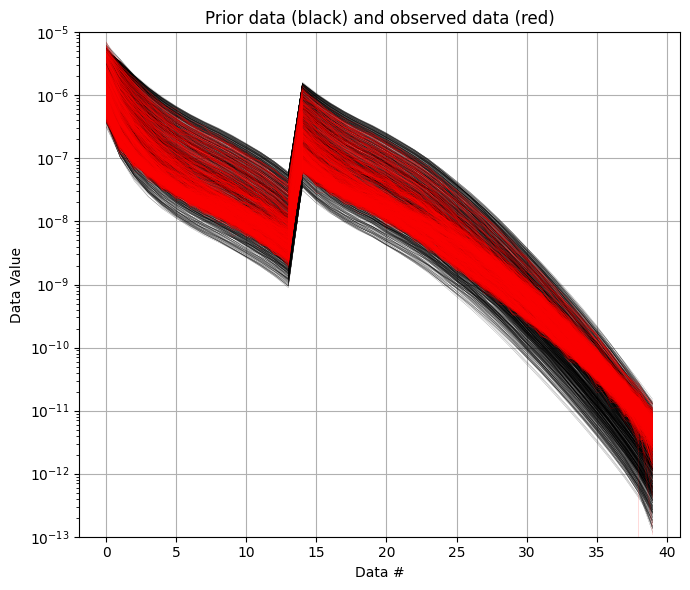

True

In [5]:
f_prior_data_h5 = ig.prior_data_gaaem(f_prior_h5, file_gex)

# plot prior and observed data to chech that the prior data span the same range as the observed data
ig.plot_data_prior(f_prior_data_h5,f_data_h5,nr=1000,alpha=1, ylim=[1e-13,1e-5], hardcopy=hardcopy) 

## Perform inversion

In [6]:
f_post_h5 = ig.integrate_rejection(f_prior_data_h5, f_data_h5, 
                                    parallel=parallel, 
                                    Ncpu=8,
                                    use_N_best=0
                                    )

Rejection Sampling:   0%|                                                                                                                       | 0/125 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                                                                       | 0/125 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                                                                       | 0/125 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                                                                       | 0/125 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                                                                       | 0/125 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                                                                       | 0/125 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                                                                       | 0/125 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                                                                       | 0/125 [00:00<?, ?it/s]

Rejection Sampling:   4%|████▍                                                                                                          | 5/125 [00:00<00:02, 46.44it/s]

Rejection Sampling:   4%|████▍                                                                                                          | 5/125 [00:00<00:02, 46.95it/s]

Rejection Sampling:   3%|███▌                                                                                                           | 4/125 [00:00<00:03, 37.30it/s]

Rejection Sampling:   4%|████▍                                                                                                          | 5/125 [00:00<00:02, 44.57it/s]

Rejection Sampling:   3%|███▌                                                                                                           | 4/125 [00:00<00:03, 34.31it/s]

Rejection Sampling:   2%|██▋                                                                                                            | 3/125 [00:00<00:04, 29.34it/s]

Rejection Sampling:   2%|██▋                                                                                                            | 3/125 [00:00<00:04, 25.49it/s]

Rejection Sampling:   4%|████▍                                                                                                          | 5/125 [00:00<00:02, 44.72it/s]

Rejection Sampling:   8%|████████▊                                                                                                     | 10/125 [00:00<00:02, 45.95it/s]

Rejection Sampling:   8%|████████▊                                                                                                     | 10/125 [00:00<00:02, 40.90it/s]

Rejection Sampling:   7%|███████▉                                                                                                       | 9/125 [00:00<00:03, 38.47it/s]

Rejection Sampling:   8%|████████▊                                                                                                     | 10/125 [00:00<00:02, 42.55it/s]

Rejection Sampling:   6%|███████                                                                                                        | 8/125 [00:00<00:03, 35.50it/s]

Rejection Sampling:   6%|███████                                                                                                        | 8/125 [00:00<00:03, 36.81it/s]

Rejection Sampling:   7%|███████▉                                                                                                       | 9/125 [00:00<00:02, 39.61it/s]

Rejection Sampling:   8%|████████▊                                                                                                     | 10/125 [00:00<00:02, 43.85it/s]

Rejection Sampling:  12%|█████████████▏                                                                                                | 15/125 [00:00<00:02, 44.52it/s]

Rejection Sampling:  10%|███████████▍                                                                                                  | 13/125 [00:00<00:02, 37.41it/s]

Rejection Sampling:  10%|███████████▍                                                                                                  | 13/125 [00:00<00:02, 39.85it/s]

Rejection Sampling:  12%|█████████████▏                                                                                                | 15/125 [00:00<00:02, 42.88it/s]

Rejection Sampling:  12%|█████████████▏                                                                                                | 15/125 [00:00<00:02, 41.89it/s]

Rejection Sampling:  11%|████████████▎                                                                                                 | 14/125 [00:00<00:02, 40.61it/s]

Rejection Sampling:  10%|███████████▍                                                                                                  | 13/125 [00:00<00:02, 39.01it/s]

Rejection Sampling:  12%|█████████████▏                                                                                                | 15/125 [00:00<00:02, 36.91it/s]

Rejection Sampling:  16%|█████████████████▌                                                                                            | 20/125 [00:00<00:02, 43.93it/s]

Rejection Sampling:  14%|██████████████▉                                                                                               | 17/125 [00:00<00:02, 38.55it/s]

Rejection Sampling:  14%|███████████████▊                                                                                              | 18/125 [00:00<00:02, 39.50it/s]

Rejection Sampling:  15%|████████████████▋                                                                                             | 19/125 [00:00<00:02, 41.47it/s]

Rejection Sampling:  14%|███████████████▊                                                                                              | 18/125 [00:00<00:02, 40.98it/s]

Rejection Sampling:  16%|█████████████████▌                                                                                            | 20/125 [00:00<00:02, 42.83it/s]

Rejection Sampling:  16%|█████████████████▌                                                                                            | 20/125 [00:00<00:02, 39.56it/s]

Rejection Sampling:  16%|█████████████████▌                                                                                            | 20/125 [00:00<00:02, 38.95it/s]

Rejection Sampling:  20%|██████████████████████                                                                                        | 25/125 [00:00<00:02, 43.30it/s]

Rejection Sampling:  18%|███████████████████▎                                                                                          | 22/125 [00:00<00:02, 41.52it/s]

Rejection Sampling:  19%|█████████████████████                                                                                         | 24/125 [00:00<00:02, 41.74it/s]

Rejection Sampling:  18%|████████████████████▏                                                                                         | 23/125 [00:00<00:02, 40.47it/s]

Rejection Sampling:  20%|██████████████████████                                                                                        | 25/125 [00:00<00:02, 42.56it/s]

Rejection Sampling:  18%|████████████████████▏                                                                                         | 23/125 [00:00<00:02, 41.34it/s]

Rejection Sampling:  20%|██████████████████████                                                                                        | 25/125 [00:00<00:02, 40.18it/s]

Rejection Sampling:  20%|██████████████████████                                                                                        | 25/125 [00:00<00:02, 40.17it/s]

Rejection Sampling:  24%|██████████████████████████▍                                                                                   | 30/125 [00:00<00:02, 43.11it/s]

Rejection Sampling:  22%|███████████████████████▊                                                                                      | 27/125 [00:00<00:02, 42.06it/s]

Rejection Sampling:  23%|█████████████████████████▌                                                                                    | 29/125 [00:00<00:02, 42.16it/s]

Rejection Sampling:  24%|██████████████████████████▍                                                                                   | 30/125 [00:00<00:02, 42.75it/s]

Rejection Sampling:  22%|████████████████████████▋                                                                                     | 28/125 [00:00<00:02, 41.32it/s]

Rejection Sampling:  22%|████████████████████████▋                                                                                     | 28/125 [00:00<00:02, 39.34it/s]

Rejection Sampling:  24%|██████████████████████████▍                                                                                   | 30/125 [00:00<00:02, 41.07it/s]

Rejection Sampling:  24%|██████████████████████████▍                                                                                   | 30/125 [00:00<00:02, 40.93it/s]

Rejection Sampling:  26%|████████████████████████████▏                                                                                 | 32/125 [00:00<00:02, 42.21it/s]

Rejection Sampling:  28%|██████████████████████████████▊                                                                               | 35/125 [00:00<00:02, 40.34it/s]

Rejection Sampling:  27%|█████████████████████████████▉                                                                                | 34/125 [00:00<00:02, 42.22it/s]

Rejection Sampling:  28%|██████████████████████████████▊                                                                               | 35/125 [00:00<00:02, 42.62it/s]

Rejection Sampling:  26%|█████████████████████████████                                                                                 | 33/125 [00:00<00:02, 41.67it/s]

Rejection Sampling:  26%|█████████████████████████████                                                                                 | 33/125 [00:00<00:02, 40.15it/s]

Rejection Sampling:  28%|██████████████████████████████▊                                                                               | 35/125 [00:00<00:02, 41.33it/s]

Rejection Sampling:  28%|██████████████████████████████▊                                                                               | 35/125 [00:00<00:02, 41.24it/s]

Rejection Sampling:  30%|████████████████████████████████▌                                                                             | 37/125 [00:00<00:02, 41.98it/s]

Rejection Sampling:  31%|██████████████████████████████████▎                                                                           | 39/125 [00:00<00:02, 41.96it/s]

Rejection Sampling:  32%|███████████████████████████████████▏                                                                          | 40/125 [00:00<00:02, 40.56it/s]

Rejection Sampling:  32%|███████████████████████████████████▏                                                                          | 40/125 [00:00<00:02, 42.22it/s]

Rejection Sampling:  30%|█████████████████████████████████▍                                                                            | 38/125 [00:00<00:02, 41.57it/s]

Rejection Sampling:  30%|█████████████████████████████████▍                                                                            | 38/125 [00:00<00:02, 40.54it/s]

Rejection Sampling:  32%|███████████████████████████████████▏                                                                          | 40/125 [00:00<00:02, 41.34it/s]

Rejection Sampling:  32%|███████████████████████████████████▏                                                                          | 40/125 [00:00<00:02, 41.27it/s]

Rejection Sampling:  34%|████████████████████████████████████▉                                                                         | 42/125 [00:01<00:01, 41.80it/s]

Rejection Sampling:  35%|██████████████████████████████████████▋                                                                       | 44/125 [00:01<00:01, 41.81it/s]

Rejection Sampling:  36%|███████████████████████████████████████▌                                                                      | 45/125 [00:01<00:01, 42.00it/s]

Rejection Sampling:  36%|███████████████████████████████████████▌                                                                      | 45/125 [00:01<00:01, 40.83it/s]

Rejection Sampling:  34%|█████████████████████████████████████▊                                                                        | 43/125 [00:01<00:01, 41.55it/s]

Rejection Sampling:  36%|███████████████████████████████████████▌                                                                      | 45/125 [00:01<00:01, 41.49it/s]

Rejection Sampling:  34%|█████████████████████████████████████▊                                                                        | 43/125 [00:01<00:02, 40.89it/s]

Rejection Sampling:  36%|███████████████████████████████████████▌                                                                      | 45/125 [00:01<00:01, 41.35it/s]

Rejection Sampling:  38%|█████████████████████████████████████████▎                                                                    | 47/125 [00:01<00:01, 41.75it/s]

Rejection Sampling:  40%|████████████████████████████████████████████                                                                  | 50/125 [00:01<00:01, 41.09it/s]

Rejection Sampling:  39%|███████████████████████████████████████████                                                                   | 49/125 [00:01<00:01, 41.75it/s]

Rejection Sampling:  38%|██████████████████████████████████████████▏                                                                   | 48/125 [00:01<00:01, 41.58it/s]

Rejection Sampling:  40%|████████████████████████████████████████████                                                                  | 50/125 [00:01<00:01, 41.86it/s]

Rejection Sampling:  38%|██████████████████████████████████████████▏                                                                   | 48/125 [00:01<00:01, 41.23it/s]

Rejection Sampling:  40%|████████████████████████████████████████████                                                                  | 50/125 [00:01<00:01, 41.59it/s]

Rejection Sampling:  40%|████████████████████████████████████████████                                                                  | 50/125 [00:01<00:01, 41.59it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▊                                                                | 52/125 [00:01<00:01, 41.88it/s]

Rejection Sampling:  43%|███████████████████████████████████████████████▌                                                              | 54/125 [00:01<00:01, 41.97it/s]

Rejection Sampling:  44%|████████████████████████████████████████████████▍                                                             | 55/125 [00:01<00:01, 41.50it/s]

Rejection Sampling:  42%|██████████████████████████████████████████████▋                                                               | 53/125 [00:01<00:01, 41.82it/s]

Rejection Sampling:  44%|████████████████████████████████████████████████▍                                                             | 55/125 [00:01<00:01, 41.89it/s]

Rejection Sampling:  44%|████████████████████████████████████████████████▍                                                             | 55/125 [00:01<00:01, 41.72it/s]

Rejection Sampling:  42%|██████████████████████████████████████████████▋                                                               | 53/125 [00:01<00:01, 41.42it/s]

Rejection Sampling:  44%|████████████████████████████████████████████████▍                                                             | 55/125 [00:01<00:01, 41.64it/s]

Rejection Sampling:  46%|██████████████████████████████████████████████████▏                                                           | 57/125 [00:01<00:01, 41.81it/s]

Rejection Sampling:  47%|███████████████████████████████████████████████████▉                                                          | 59/125 [00:01<00:01, 42.01it/s]

Rejection Sampling:  46%|███████████████████████████████████████████████████                                                           | 58/125 [00:01<00:01, 41.90it/s]

Rejection Sampling:  48%|████████████████████████████████████████████████████▊                                                         | 60/125 [00:01<00:01, 42.09it/s]

Rejection Sampling:  48%|████████████████████████████████████████████████████▊                                                         | 60/125 [00:01<00:01, 40.75it/s]

Rejection Sampling:  48%|████████████████████████████████████████████████████▊                                                         | 60/125 [00:01<00:01, 42.02it/s]

Rejection Sampling:  46%|███████████████████████████████████████████████████                                                           | 58/125 [00:01<00:01, 41.81it/s]

Rejection Sampling:  48%|████████████████████████████████████████████████████▊                                                         | 60/125 [00:01<00:01, 42.09it/s]

Rejection Sampling:  50%|██████████████████████████████████████████████████████▌                                                       | 62/125 [00:01<00:01, 39.82it/s]

Rejection Sampling:  51%|████████████████████████████████████████████████████████▎                                                     | 64/125 [00:01<00:01, 42.17it/s]

Rejection Sampling:  50%|███████████████████████████████████████████████████████▍                                                      | 63/125 [00:01<00:01, 42.12it/s]

Rejection Sampling:  52%|█████████████████████████████████████████████████████████▏                                                    | 65/125 [00:01<00:01, 42.21it/s]

Rejection Sampling:  52%|█████████████████████████████████████████████████████████▏                                                    | 65/125 [00:01<00:01, 42.25it/s]

Rejection Sampling:  52%|█████████████████████████████████████████████████████████▏                                                    | 65/125 [00:01<00:01, 42.03it/s]

Rejection Sampling:  50%|███████████████████████████████████████████████████████▍                                                      | 63/125 [00:01<00:01, 41.90it/s]

Rejection Sampling:  52%|█████████████████████████████████████████████████████████▏                                                    | 65/125 [00:01<00:01, 41.94it/s]

Rejection Sampling:  55%|████████████████████████████████████████████████████████████▋                                                 | 69/125 [00:01<00:01, 41.96it/s]

Rejection Sampling:  56%|█████████████████████████████████████████████████████████████▌                                                | 70/125 [00:01<00:01, 42.00it/s]

Rejection Sampling:  54%|███████████████████████████████████████████████████████████▊                                                  | 68/125 [00:01<00:01, 41.92it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▉                                                   | 67/125 [00:01<00:01, 40.29it/s]

Rejection Sampling:  56%|█████████████████████████████████████████████████████████████▌                                                | 70/125 [00:01<00:01, 42.01it/s]

Rejection Sampling:  54%|███████████████████████████████████████████████████████████▊                                                  | 68/125 [00:01<00:01, 41.75it/s]

Rejection Sampling:  56%|█████████████████████████████████████████████████████████████▌                                                | 70/125 [00:01<00:01, 41.81it/s]

Rejection Sampling:  56%|█████████████████████████████████████████████████████████████▌                                                | 70/125 [00:01<00:01, 41.72it/s]

Rejection Sampling:  59%|█████████████████████████████████████████████████████████████████                                             | 74/125 [00:01<00:01, 41.73it/s]

Rejection Sampling:  58%|███████████████████████████████████████████████████████████████▎                                              | 72/125 [00:01<00:01, 40.56it/s]

Rejection Sampling:  60%|██████████████████████████████████████████████████████████████████                                            | 75/125 [00:01<00:01, 41.75it/s]

Rejection Sampling:  58%|████████████████████████████████████████████████████████████████▏                                             | 73/125 [00:01<00:01, 41.70it/s]

Rejection Sampling:  60%|██████████████████████████████████████████████████████████████████                                            | 75/125 [00:01<00:01, 41.76it/s]

Rejection Sampling:  58%|████████████████████████████████████████████████████████████████▏                                             | 73/125 [00:01<00:01, 41.81it/s]

Rejection Sampling:  60%|██████████████████████████████████████████████████████████████████                                            | 75/125 [00:01<00:01, 41.85it/s]

Rejection Sampling:  60%|██████████████████████████████████████████████████████████████████                                            | 75/125 [00:01<00:01, 42.01it/s]

Rejection Sampling:  63%|█████████████████████████████████████████████████████████████████████▌                                        | 79/125 [00:01<00:01, 42.18it/s]

Rejection Sampling:  62%|████████████████████████████████████████████████████████████████████▋                                         | 78/125 [00:01<00:01, 42.15it/s]

Rejection Sampling:  64%|██████████████████████████████████████████████████████████████████████▍                                       | 80/125 [00:01<00:01, 42.20it/s]

Rejection Sampling:  62%|███████████████████████████████████████████████████████████████████▊                                          | 77/125 [00:01<00:01, 40.38it/s]

Rejection Sampling:  62%|████████████████████████████████████████████████████████████████████▋                                         | 78/125 [00:01<00:01, 42.02it/s]

Rejection Sampling:  64%|██████████████████████████████████████████████████████████████████████▍                                       | 80/125 [00:01<00:01, 39.76it/s]

Rejection Sampling:  64%|██████████████████████████████████████████████████████████████████████▍                                       | 80/125 [00:01<00:01, 42.04it/s]

Rejection Sampling:  64%|██████████████████████████████████████████████████████████████████████▍                                       | 80/125 [00:01<00:01, 42.08it/s]

Rejection Sampling:  66%|████████████████████████████████████████████████████████████████████████▏                                     | 82/125 [00:02<00:01, 42.01it/s]

Rejection Sampling:  67%|█████████████████████████████████████████████████████████████████████████▉                                    | 84/125 [00:02<00:00, 42.29it/s]

Rejection Sampling:  66%|█████████████████████████████████████████████████████████████████████████                                     | 83/125 [00:02<00:00, 42.29it/s]

Rejection Sampling:  68%|██████████████████████████████████████████████████████████████████████████▊                                   | 85/125 [00:02<00:00, 42.31it/s]

Rejection Sampling:  68%|██████████████████████████████████████████████████████████████████████████▊                                   | 85/125 [00:02<00:00, 42.42it/s]

Rejection Sampling:  66%|█████████████████████████████████████████████████████████████████████████                                     | 83/125 [00:02<00:01, 41.53it/s]

Rejection Sampling:  68%|██████████████████████████████████████████████████████████████████████████▊                                   | 85/125 [00:02<00:01, 38.68it/s]

Rejection Sampling:  68%|██████████████████████████████████████████████████████████████████████████▊                                   | 85/125 [00:02<00:00, 42.53it/s]

Rejection Sampling:  70%|████████████████████████████████████████████████████████████████████████████▌                                 | 87/125 [00:02<00:00, 42.70it/s]

Rejection Sampling:  70%|█████████████████████████████████████████████████████████████████████████████▍                                | 88/125 [00:02<00:00, 42.74it/s]

Rejection Sampling:  71%|██████████████████████████████████████████████████████████████████████████████▎                               | 89/125 [00:02<00:00, 42.62it/s]

Rejection Sampling:  72%|███████████████████████████████████████████████████████████████████████████████▏                              | 90/125 [00:02<00:00, 42.10it/s]

Rejection Sampling:  70%|█████████████████████████████████████████████████████████████████████████████▍                                | 88/125 [00:02<00:00, 42.36it/s]

Rejection Sampling:  72%|███████████████████████████████████████████████████████████████████████████████▏                              | 90/125 [00:02<00:00, 41.00it/s]

Rejection Sampling:  72%|███████████████████████████████████████████████████████████████████████████████▏                              | 90/125 [00:02<00:00, 40.08it/s]

Rejection Sampling:  72%|███████████████████████████████████████████████████████████████████████████████▏                              | 90/125 [00:02<00:00, 42.78it/s]

Rejection Sampling:  74%|████████████████████████████████████████████████████████████████████████████████▉                             | 92/125 [00:02<00:00, 42.78it/s]

Rejection Sampling:  74%|█████████████████████████████████████████████████████████████████████████████████▊                            | 93/125 [00:02<00:00, 42.95it/s]

Rejection Sampling:  75%|██████████████████████████████████████████████████████████████████████████████████▋                           | 94/125 [00:02<00:00, 42.60it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████████████████████████████████████████▌                          | 95/125 [00:02<00:00, 42.58it/s]

Rejection Sampling:  74%|█████████████████████████████████████████████████████████████████████████████████▊                            | 93/125 [00:02<00:00, 42.78it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████████████████████████████████████████▌                          | 95/125 [00:02<00:00, 42.73it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████████████████████████████████████████▌                          | 95/125 [00:02<00:00, 41.71it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████████████████████████████████████████▌                          | 95/125 [00:02<00:00, 42.15it/s]

Rejection Sampling:  79%|███████████████████████████████████████████████████████████████████████████████████████                       | 99/125 [00:02<00:00, 42.43it/s]

Rejection Sampling:  78%|█████████████████████████████████████████████████████████████████████████████████████▎                        | 97/125 [00:02<00:00, 42.03it/s]

Rejection Sampling:  78%|██████████████████████████████████████████████████████████████████████████████████████▏                       | 98/125 [00:02<00:00, 42.15it/s]

Rejection Sampling:  80%|███████████████████████████████████████████████████████████████████████████████████████▏                     | 100/125 [00:02<00:00, 42.47it/s]

Rejection Sampling:  80%|███████████████████████████████████████████████████████████████████████████████████████▏                     | 100/125 [00:02<00:00, 42.75it/s]

Rejection Sampling:  80%|███████████████████████████████████████████████████████████████████████████████████████▏                     | 100/125 [00:02<00:00, 42.62it/s]

Rejection Sampling:  78%|██████████████████████████████████████████████████████████████████████████████████████▏                       | 98/125 [00:02<00:00, 42.37it/s]

Rejection Sampling:  80%|███████████████████████████████████████████████████████████████████████████████████████▏                     | 100/125 [00:02<00:00, 42.10it/s]

Rejection Sampling:  83%|██████████████████████████████████████████████████████████████████████████████████████████▋                  | 104/125 [00:02<00:00, 42.09it/s]

Rejection Sampling:  82%|████████████████████████████████████████████████████████████████████████████████████████▉                    | 102/125 [00:02<00:00, 41.91it/s]

Rejection Sampling:  82%|█████████████████████████████████████████████████████████████████████████████████████████▊                   | 103/125 [00:02<00:00, 42.00it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████████████████████████████████████████████████▌                 | 105/125 [00:02<00:00, 42.23it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████████████████████████████████████████████████▌                 | 105/125 [00:02<00:00, 42.36it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████████████████████████████████████████████████▌                 | 105/125 [00:02<00:00, 42.23it/s]

Rejection Sampling:  82%|█████████████████████████████████████████████████████████████████████████████████████████▊                   | 103/125 [00:02<00:00, 42.07it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████████████████████████████████████████████████▌                 | 105/125 [00:02<00:00, 41.87it/s]

Rejection Sampling:  87%|███████████████████████████████████████████████████████████████████████████████████████████████              | 109/125 [00:02<00:00, 41.77it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████████████████████████████████████████████████▎               | 107/125 [00:02<00:00, 41.65it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████████████████████████████████████████████▉             | 110/125 [00:02<00:00, 41.87it/s]

Rejection Sampling:  86%|██████████████████████████████████████████████████████████████████████████████████████████████▏              | 108/125 [00:02<00:00, 41.70it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████████████████████████████████████████████▉             | 110/125 [00:02<00:00, 42.05it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████████████████████████████████████████████▉             | 110/125 [00:02<00:00, 41.97it/s]

Rejection Sampling:  86%|██████████████████████████████████████████████████████████████████████████████████████████████▏              | 108/125 [00:02<00:00, 41.85it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████████████████████████████████████████████▉             | 110/125 [00:02<00:00, 41.93it/s]

Rejection Sampling:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████▋           | 112/125 [00:02<00:00, 41.90it/s]

Rejection Sampling:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████▍         | 114/125 [00:02<00:00, 41.96it/s]

Rejection Sampling:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████▌          | 113/125 [00:02<00:00, 41.95it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 115/125 [00:02<00:00, 42.05it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 115/125 [00:02<00:00, 42.17it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 115/125 [00:02<00:00, 41.76it/s]

Rejection Sampling:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████▌          | 113/125 [00:02<00:00, 41.71it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 115/125 [00:02<00:00, 41.96it/s]

Rejection Sampling:  94%|██████████████████████████████████████████████████████████████████████████████████████████████████████       | 117/125 [00:02<00:00, 41.72it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 119/125 [00:02<00:00, 41.77it/s]

Rejection Sampling:  94%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 118/125 [00:02<00:00, 41.75it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 120/125 [00:02<00:00, 41.83it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 120/125 [00:02<00:00, 42.19it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 120/125 [00:02<00:00, 42.07it/s]

Rejection Sampling:  94%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 118/125 [00:02<00:00, 42.14it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 120/125 [00:02<00:00, 41.94it/s]

Rejection Sampling:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 122/125 [00:02<00:00, 41.93it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 123/125 [00:02<00:00, 41.91it/s]

Rejection Sampling:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 124/125 [00:02<00:00, 41.85it/s]

Rejection Sampling: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 125/125 [00:02<00:00, 41.82it/s]

Rejection Sampling: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 125/125 [00:02<00:00, 42.23it/s]

Rejection Sampling: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 125/125 [00:02<00:00, 42.15it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 123/125 [00:02<00:00, 42.20it/s]

Rejection Sampling: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 125/125 [00:02<00:00, 43.12it/s]

integrate_rejection: Time=  3.1s/1000 soundings,  3.1ms/sounding, 326.2it/s. T_av=3.9, EV_av=-31.7


M1-continuous:   0%|                                                                                                                           | 0/1000 [00:00<?, ?it/s]

M2-continuous:   0%|                                                                                                                           | 0/1000 [00:00<?, ?it/s]

M3-continuous:   0%|                                                                                                                           | 0/1000 [00:00<?, ?it/s]

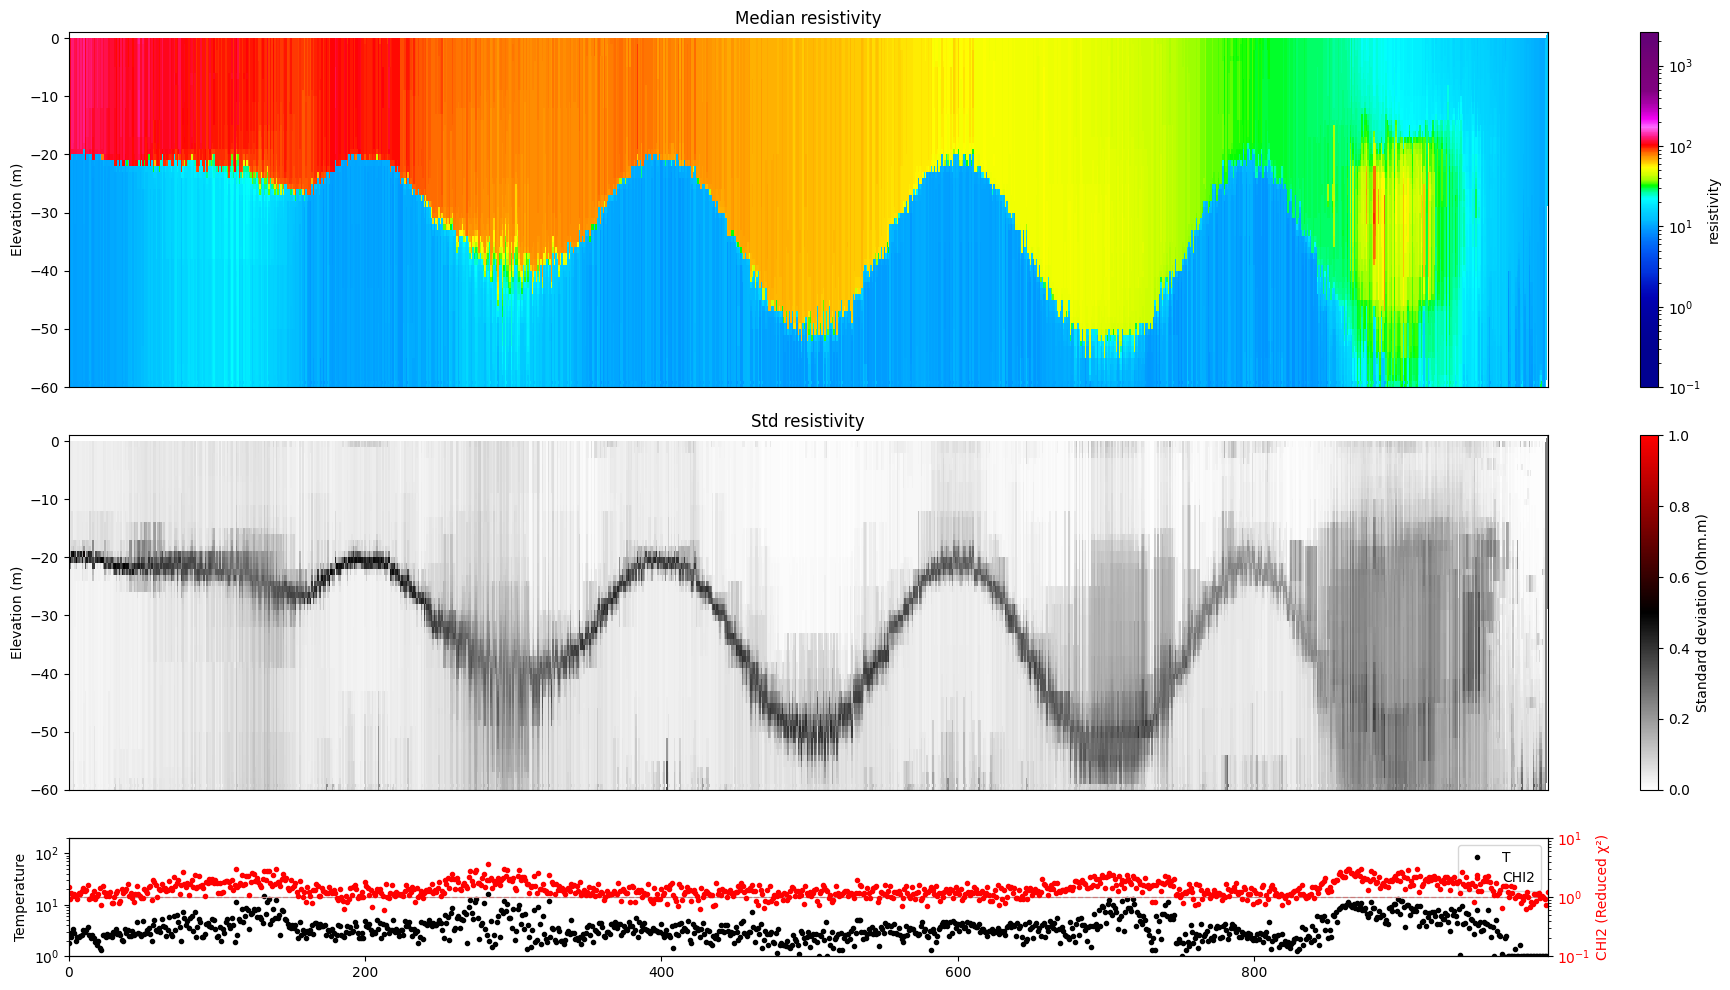

In [7]:
clim = [0.8*min(rho), 1.2*max(rho)]
#ig.plot_profile(f_post_h5, i1=0, i2=1000, hardcopy=hardcopy,  clim = clim)
ig.plot_profile(f_post_h5, i1=0, i2=1000, hardcopy=hardcopy,  im=1)

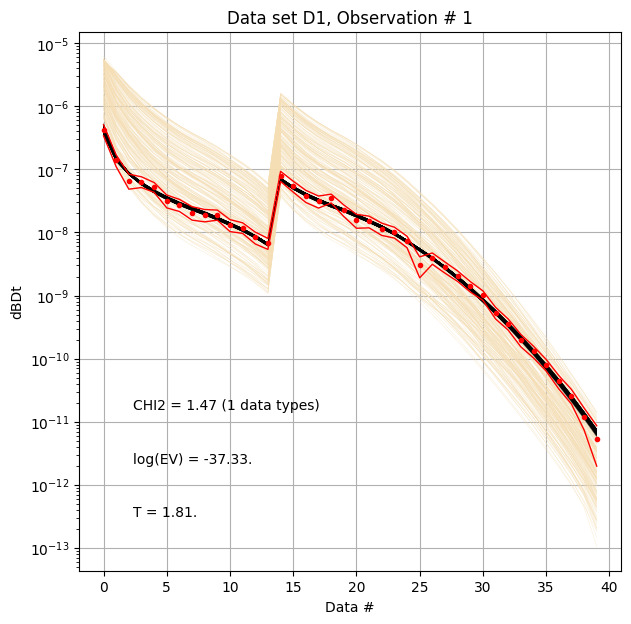

In [8]:
ig.plot_data_prior_post(f_post_h5, i_plot=0, hardcopy=hardcopy)

## Compare reference model to posterior median

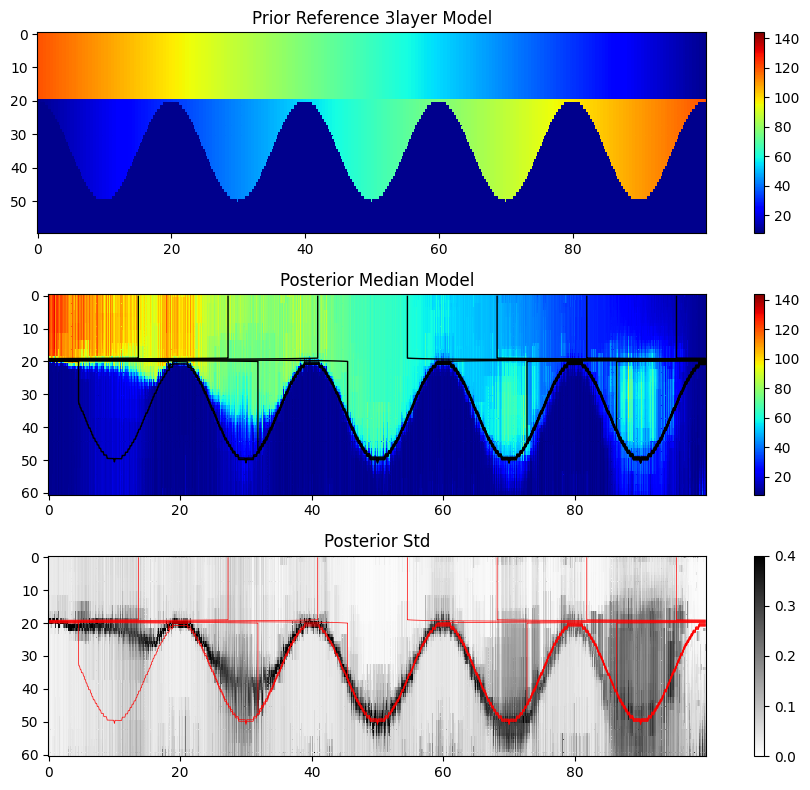

In [9]:
# Read 'M1/Median' from f_post_h5
with h5py.File(f_post_h5, 'r') as f_post:
    M_median = f_post['/M1/Median'][:]
    M_mean = f_post['/M1/Mean'][:]
    M_std = f_post['/M1/Std'][:]

with h5py.File(f_prior_h5,'r') as f_prior:
    # REad 'x' feature from f_prior
    z =  f_prior['/M1'].attrs['x']

xx, zz = np.meshgrid(x_ref, z)

# Make a figure with two subplots, each with plt.pcolor(xx,zz,M_median.T) and, plt.pcolor(xx_ref,zz_ref,M_ref.T), and use the same colorbar and x.axis
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8))

clim = [0.8*min(rho), 1.2*max(rho)]
# Fisrt subplot - ref model
c1 = ax1.pcolor(xx_ref, zz_ref, M_ref.T, clim=clim, cmap='jet')
ax1.invert_yaxis()
#ax1.axis('equal')
fig.colorbar(c1, ax=ax1)
ax1.set_title('Prior Reference %s Model' % case)

# Second subplot - Median
c2 = ax2.pcolor(xx, zz, M_mean.T, clim=clim, cmap='jet')
ax2.invert_yaxis()
#ax2.axis('equal')
fig.colorbar(c2, ax=ax2)
ax2.set_title('Posterior Median Model')
# add a contour plot of xx_ref, zz_ref, M_ref.T on top of current figure
ax2.contour(xx_ref, zz_ref, M_ref.T, colors='k', linewidths=1)

# Third subplot - Std
c3 = ax3.pcolor(xx, zz, M_std.T, clim=[0,0.4], cmap='gray_r')
ax3.invert_yaxis()
#ax3.axis('equal')
fig.colorbar(c3, ax=ax3)
ax3.set_title('Posterior Std')
# add a contour plot of xx_ref, zz_ref, M_ref.T on top of current figure
ax3.contour(xx_ref, zz_ref, M_ref.T, colors='r', linewidths=.5)

# change aspect ratio of the figure to 2:1
ax1.set_aspect(.5)
ax2.set_aspect(.5)
ax3.set_aspect(.5)

plt.tight_layout()
plt.savefig('Synthetic_%s_%s_z%d_rho%d-%d-%d_Nlay%d-%d_N%d' % (case.upper(),RHO_dist,z_max, rho[0],rho[1],rho[2],NLAY_min, NLAY_max,N))
plt.show()